In [281]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import acquire_zillow
from acquire_zillow import get_connection
from acquire_zillow import get_properties_2016
from acquire_zillow import get_properties_2017
from acquire_zillow import get_zillow_csv

import prepare_zillow
from prepare_zillow import reindex_zillow
from prepare_zillow import drop_land_listings
from prepare_zillow import convert_num_to_categorical
from prepare_zillow import convert_numerical_object_to_int

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.cluster import KMeans

import scipy.stats as stats
from scipy.stats import pearsonr

from mpl_toolkits.mplot3d import Axes3D

import graphviz
from graphviz import Graph

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

random_state=123

import env

In [2]:
# get_zillow_csv()

In [88]:
df = pd.read_csv('zillow_properties.csv')

In [89]:
df.shape

(167854, 68)

# Data Prep

In [90]:
df = reindex_zillow(df)

In [91]:
drop_land_listings(df)
df.shape

(112689, 67)

In [92]:
convert_num_to_categorical(df)
df.dtypes

parcelid                           int64
logerror                         float64
bedroomcnt                       float64
bathroomcnt                      float64
calculatedfinishedsquarefeet     float64
transactiondate                   object
yearbuilt                        float64
fips                            category
latitude                         float64
longitude                        float64
airconditioningtypeid           category
airconditioningdesc               object
architecturalstyletypeid        category
architecturalstyledesc            object
basementsqft                     float64
buildingclasstypeid              float64
buildingqualitytypeid            float64
buildingclassdesc                 object
calculatedbathnbr                float64
decktypeid                      category
finishedfloor1squarefeet         float64
finishedsquarefeet12             float64
finishedsquarefeet13             float64
finishedsquarefeet15             float64
finishedsquarefe

In [93]:
convert_numerical_object_to_int(df)
df.dtypes

parcelid                           int64
logerror                         float64
bedroomcnt                       float64
bathroomcnt                      float64
calculatedfinishedsquarefeet     float64
transactiondate                    int64
yearbuilt                        float64
fips                            category
latitude                         float64
longitude                        float64
airconditioningtypeid           category
airconditioningdesc               object
architecturalstyletypeid        category
architecturalstyledesc            object
basementsqft                     float64
buildingclasstypeid              float64
buildingqualitytypeid            float64
buildingclassdesc                 object
calculatedbathnbr                float64
decktypeid                      category
finishedfloor1squarefeet         float64
finishedsquarefeet12             float64
finishedsquarefeet13             float64
finishedsquarefeet15             float64
finishedsquarefe

In [94]:
df.isnull().sum()

parcelid                             0
logerror                             0
bedroomcnt                           0
bathroomcnt                          0
calculatedfinishedsquarefeet        13
transactiondate                      0
yearbuilt                           73
fips                                 0
latitude                             0
longitude                            0
airconditioningtypeid            83367
airconditioningdesc              83367
architecturalstyletypeid        112508
architecturalstyledesc          112508
basementsqft                    112604
buildingclasstypeid             112689
buildingqualitytypeid            40120
buildingclassdesc               112689
calculatedbathnbr                   30
decktypeid                      111883
finishedfloor1squarefeet        103387
finishedsquarefeet12               357
finishedsquarefeet13            112661
finishedsquarefeet15            112689
finishedsquarefeet50            103387
finishedsquarefeet6      

#### Include only single unit properties (e.g. no duplexes, no land/lot, ...) For some properties, you will need to use multiple fields to estimate whether it is a single unit property.

In [53]:
# df['propertylandusedesc'].value_counts()

In [11]:
# df.loc[(df['propertylandusedesc'] != 'Single Family Residential') &\
#       (df['propertylandusedesc'] != 'Mobile Home') &\
#       (df['propertylandusedesc'] != 'Manufactured, Modular, Prefabricated Homes')]

The following function will remove any listings that have 0 restrooms, 0 bedrooms, or a unincnt listing with 2 or more.  Additionally, it will remove all listings that are not either listed as Single Family Residential, Mobile Home, or Manufactured, Modular, Prefrabricated Homes in the propertylandusedesc column.

In [12]:
# def drop_land_listings(df):
#     df.drop(df[df['bedroomcnt'] == 0.0].index, inplace=True)
#     df.drop(df[df['bathroomcnt'] == 0.0].index, inplace=True)
#     df.drop(df[df['unitcnt'] >= 2.0].index, inplace=True)
#     df.drop(df[(df['propertylandusedesc'] != 'Single Family Residential') &\
#       (df['propertylandusedesc'] != 'Mobile Home') &\
#       (df['propertylandusedesc'] != 'Manufactured, Modular, Prefabricated Homes')].index, inplace=True)
#     return df

In [13]:
# drop_land_listings(df)
# df.shape

Creat a function that takes in a dataframe and a list of columns names and returns the dataframe with the datatypes of those columns changed to a non-numeric type.
Use this function to appropriately transform any numeric columns that should not be treated as numbers



Below are the unique values in each numerial feature.  We will convert columns with 5 or less to categorical data.

In [14]:
# df.select_dtypes('number').nunique()

In [15]:
# list_to_categorical = ['fips', 'airconditioningtypeid', 'architecturalstyletypeid', 'decktypeid', 'fireplacecnt', 'hashottuborspa', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'regionidcounty', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'numberofstories', 'fireplaceflag', 'assessmentyear']

In [16]:
# def convert_num_to_categorical(df, list_of_cols):
#     for col in list_of_cols:
#         df[[col]] = df[[col]].astype('category')
#     return df

In [17]:
# convert_num_to_categorical(df, list_to_categorical)
# df.dtypes

Looking at this list below, transaction date and propertycountlandusecode should be numerical instead of objects.
- Update: Propertycountylandusecode has multiple rows with mixed numeric and alpha values.  Transactiondate will be the only feature that will be converted to numeric.

In [18]:
# df.select_dtypes('object')

In [19]:
# df['transactiondate'] = pd.to_numeric(df.transactiondate.str.replace('-', ''))
# df.head()


In [20]:
# cols_to_numeric = ['transactiondate']
# def convert_date_object_to_int(df, list_of_cols):
#     for col in list_of_cols:
#         df[[col]] = df[[col]].astype(int)
#     return df
    

In [21]:
# convert_date_object_to_int(df, cols_to_numeric)
# df.head()

First time through: Drop rows with low amounts of missing values and drop features with very high amounts.

In [22]:
# df.shape

In [23]:
# df.isnull().sum()

In [95]:
df.drop(columns=['airconditioningtypeid',
 'airconditioningdesc',
 'architecturalstyletypeid',
 'architecturalstyledesc',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'buildingclassdesc',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'heatingorsystemdesc',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidneighborhood',
 'storytypeid',
 'storydesc',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'typeconstructiondesc',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'censustractandblock'], axis=1, inplace=True)

In [25]:
list(df)

['parcelid',
 'logerror',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'transactiondate',
 'yearbuilt',
 'fips',
 'latitude',
 'longitude',
 'calculatedbathnbr',
 'fullbathcnt',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertylandusedesc',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount']

In [26]:
df.isnull().sum()

parcelid                          0
logerror                          0
bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     13
transactiondate                   0
yearbuilt                        73
fips                              0
latitude                          0
longitude                         0
calculatedbathnbr                30
fullbathcnt                      30
lotsizesquarefeet               693
propertycountylandusecode         0
propertylandusetypeid             0
propertylandusedesc               0
regionidcounty                    0
regionidzip                      29
roomcnt                           0
structuretaxvaluedollarcnt      124
taxvaluedollarcnt                 2
assessmentyear                    0
landtaxvaluedollarcnt             2
taxamount                         9
dtype: int64

Let's fill the missing yearbuilts with the median year.

In [27]:
df.describe()

parcelid       logerror     bedroomcnt    bathroomcnt  \
count  1.126890e+05  112689.000000  112689.000000  112689.000000   
mean   1.298440e+07       0.014910       3.301369       2.297216   
std    2.958731e+06       0.167033       0.926512       1.009962   
min    1.071174e+07      -4.655420       1.000000       1.000000   
25%    1.152288e+07      -0.025300       3.000000       2.000000   
50%    1.259081e+07       0.006000       3.000000       2.000000   
75%    1.412990e+07       0.040130       4.000000       3.000000   
max    1.676392e+08       5.262999      16.000000      20.000000   

       calculatedfinishedsquarefeet  transactiondate      yearbuilt  \
count                 112676.000000     1.126890e+05  112616.000000   
mean                    1912.749334     2.016521e+07    1963.314387   
std                      986.127593     4.954833e+03      23.043022   
min                       66.000000     2.016010e+07    1878.000000   
25%                     1270.000000     2.016060e+07    1950.000000   
50%                     1655.000000     2.016101e+07    1960.000000   
75%                     2288.250000     2.017052e+07    1979.000000   
max                    21929.000000     2.017092e+07    2016.000000   

           latitude     longitude  calculatedbathnbr    fullbathcnt  \
count  1.126890e+05  1.126890e+05      112659.000000  112659.000000   
mean   3.402105e+07 -1.181915e+08           2.297153       2.231761   
std    2.738277e+05  3.561135e+05           1.009962       0.985068   
min    3.334004e+07 -1.194754e+08           1.000000       1.000000   
25%    3.382518e+07 -1.183987e+08           2.000000       2.000000   
50%    3.402252e+07 -1.181495e+08           2.000000       2.000000   
75%    3.418631e+07 -1.179281e+08           3.000000       3.000000   
max    3.481877e+07 -1.175546e+08          20.000000      20.000000   

       lotsizesquarefeet    regionidzip        roomcnt  \
count       1.119960e+05  112660.000000  112689.000000   
mean        1.111758e+04   96632.208228       1.906805   
std         8.309766e+04    4443.508918       3.148541   
min         2.360000e+02   95982.000000       0.000000   
25%         5.589000e+03   96208.000000       0.000000   
50%         6.825000e+03   96415.000000       0.000000   
75%         8.760000e+03   96995.000000       5.000000   
max         6.971010e+06  399675.000000      18.000000   

       structuretaxvaluedollarcnt  taxvaluedollarcnt  landtaxvaluedollarcnt  \
count                1.125650e+05       1.126870e+05           1.126870e+05   
mean                 1.900970e+05       5.072800e+05           3.173888e+05   
std                  2.430791e+05       6.729830e+05           4.900154e+05   
min                  1.000000e+02       1.000000e+03           1.610000e+02   
25%                  7.560400e+04       1.908160e+05           7.501500e+04   
50%                  1.291500e+05       3.635890e+05           2.116180e+05   
75%                  2.200000e+05       5.997200e+05           3.941940e+05   
max                  9.948100e+06       2.775000e+07           2.450000e+07   

           taxamount  
count  112680.000000  
mean     6417.722407  
std      8014.323830  
min        49.080000  
25%      2802.115000  
50%      4714.950000  
75%      7342.462500  
max    321936.090000

Drop calcsqft under 400 sq ft. Drop zips over 5 digits(100000).  These are data integrity issues.

In [96]:
df['yearbuilt'].fillna(1960, inplace=True)

In [97]:
df.isnull().sum()

parcelid                          0
logerror                          0
bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     13
transactiondate                   0
yearbuilt                         0
fips                              0
latitude                          0
longitude                         0
calculatedbathnbr                30
fullbathcnt                      30
lotsizesquarefeet               693
propertycountylandusecode         0
propertylandusetypeid             0
propertylandusedesc               0
regionidcounty                    0
regionidzip                      29
roomcnt                           0
structuretaxvaluedollarcnt      124
taxvaluedollarcnt                 2
assessmentyear                    0
landtaxvaluedollarcnt             2
taxamount                         9
dtype: int64

This is the first run through.  Our second run through will include more prep, but for now, let's just drop NA's.

In [98]:
df.dropna(axis=0, inplace=True)

In [99]:
df.isnull().sum()

parcelid                        0
logerror                        0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
transactiondate                 0
yearbuilt                       0
fips                            0
latitude                        0
longitude                       0
calculatedbathnbr               0
fullbathcnt                     0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertylandusedesc             0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
dtype: int64

In [100]:
df.drop(df.loc[df['regionidzip'] > 100000].index, inplace=True)

In [101]:
df.drop(df.loc[df['calculatedfinishedsquarefeet'] < 450].index, inplace=True)

In [102]:
def maggie_remove_outliers(df):
    keys = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet',
                          'structuretaxvaluedollarcnt','landtaxvaluedollarcnt']
    values = [(1,7), (1,7), (500,8000), (25000,2000000), (10000,2500000)]

    dictionary = dict(zip(keys, values))

    for key, value in dictionary.items():
        df = df[df[key] >= value[0]]
        df = df[df[key] <= value[1]]
    return df

In [103]:
df = maggie_remove_outliers(df)
df.describe()

parcelid       logerror     bedroomcnt    bathroomcnt  \
count  1.071490e+05  107149.000000  107149.000000  107149.000000   
mean   1.299494e+07       0.014433       3.319116       2.302355   
std    2.528371e+06       0.161052       0.892458       0.935330   
min    1.071174e+07      -4.655420       1.000000       1.000000   
25%    1.150601e+07      -0.025195       3.000000       2.000000   
50%    1.263826e+07       0.006000       3.000000       2.000000   
75%    1.414618e+07       0.038913       4.000000       3.000000   
max    1.629608e+08       4.445000       7.000000       7.000000   

       calculatedfinishedsquarefeet  transactiondate      yearbuilt  \
count                 107149.000000     1.071490e+05  107149.000000   
mean                    1904.860521     2.016521e+07    1963.957116   
std                      877.060043     4.955056e+03      22.476401   
min                      500.000000     2.016010e+07    1880.000000   
25%                     1296.000000     2.016061e+07    1951.000000   
50%                     1674.000000     2.016101e+07    1961.000000   
75%                     2291.000000     2.017052e+07    1979.000000   
max                     7985.000000     2.017092e+07    2016.000000   

           latitude     longitude  calculatedbathnbr    fullbathcnt  \
count  1.071490e+05  1.071490e+05      107149.000000  107149.000000   
mean   3.402149e+07 -1.181903e+08           2.302355       2.235289   
std    2.759448e+05  3.599116e+05           0.935330       0.912038   
min    3.334004e+07 -1.194753e+08           1.000000       1.000000   
25%    3.382265e+07 -1.184003e+08           2.000000       2.000000   
50%    3.402204e+07 -1.181427e+08           2.000000       2.000000   
75%    3.418978e+07 -1.179237e+08           3.000000       3.000000   
max    3.481877e+07 -1.175546e+08           7.000000       7.000000   

       lotsizesquarefeet    regionidzip        roomcnt  \
count       1.071490e+05  107149.000000  107149.000000   
mean        1.104254e+04   96577.995856       1.965207   
std         8.468260e+04     419.362372       3.182551   
min         2.360000e+02   95982.000000       0.000000   
25%         5.615000e+03   96213.000000       0.000000   
50%         6.857000e+03   96424.000000       0.000000   
75%         8.763000e+03   96996.000000       5.000000   
max         6.971010e+06   97344.000000      15.000000   

       structuretaxvaluedollarcnt  taxvaluedollarcnt  landtaxvaluedollarcnt  \
count                1.071490e+05       1.071490e+05           1.071490e+05   
mean                 1.830208e+05       4.799604e+05           2.969395e+05   
std                  1.742176e+05       4.355873e+05           3.098105e+05   
min                  2.500000e+04       3.615200e+04           1.009300e+04   
25%                  7.989900e+04       2.050790e+05           8.528100e+04   
50%                  1.319950e+05       3.710330e+05           2.174020e+05   
75%                  2.201690e+05       6.000000e+05           3.950000e+05   
max                  1.976957e+06       4.403314e+06           2.498951e+06   

           taxamount  
count  107149.000000  
mean     6076.510695  
std      5268.387500  
min        49.080000  
25%      2931.880000  
50%      4780.900000  
75%      7331.740000  
max    173218.070000

# Data Exploration

In [172]:
df.dtypes

parcelid                               int64
logerror                             float64
bedroomcnt                           float64
bathroomcnt                          float64
calculatedfinishedsquarefeet         float64
transactiondate                        int64
yearbuilt                            float64
fips                                category
latitude                             float64
longitude                            float64
calculatedbathnbr                    float64
fullbathcnt                          float64
lotsizesquarefeet                    float64
propertycountylandusecode             object
propertylandusetypeid               category
propertylandusedesc                   object
regionidcounty                      category
regionidzip                          float64
roomcnt                              float64
structuretaxvaluedollarcnt           float64
taxvaluedollarcnt                    float64
assessmentyear                      category
landtaxval

In [173]:
df.select_dtypes('number').nunique()

parcelid                            105474
logerror                             51095
bedroomcnt                               7
bathroomcnt                             13
calculatedfinishedsquarefeet          5029
transactiondate                        605
yearbuilt                              133
latitude                             98483
longitude                            99824
calculatedbathnbr                       13
fullbathcnt                              7
lotsizesquarefeet                    19221
regionidzip                            377
roomcnt                                 16
structuretaxvaluedollarcnt           70389
taxvaluedollarcnt                    74303
landtaxvaluedollarcnt                72096
taxamount                            99348
transactiondate_bin                      8
yearbuilt_bin                           12
latitude_bin                            12
longitude_bin                           12
lotsizesquarefeet_bin                   12
structureta

Let's bin a few features to get a few columns that are more categorical.

In [104]:
df['bedroomcnt_bin'] =  pd.cut(df['bedroomcnt'], bins=[0,2,3,5,9,15,25], labels=[1,2,3,4,5,6])

In [105]:
df['bathroomcnt_bin'] =  pd.cut(df['bathroomcnt'], bins=[0,1,2,5,9,15,25], labels=[1,2,3,4,5,6])

In [106]:
df['transactiondate_bin'] =  pd.qcut(df['transactiondate'], 8, labels=False)

In [107]:
df['yearbuilt_bin'] =  pd.qcut(df['yearbuilt'], 12, labels=False)

In [108]:
df['latitude_bin'] =  pd.qcut(df['latitude'], 12, labels=False)

In [109]:
df['longitude_bin'] =  pd.qcut(df['longitude'], 12, labels=False)

In [110]:
df['lotsizesquarefeet_bin'] =  pd.qcut(df['lotsizesquarefeet'], 12, labels=False)

In [111]:
df['structuretaxvaluedollarcnt_bin'] =  pd.qcut(df['structuretaxvaluedollarcnt'], 12, labels=False)

In [112]:
df['landtaxvaluedollarcnt_bin'] =  pd.qcut(df['landtaxvaluedollarcnt'], 12, labels=False)

In [113]:
df['taxamount_bin'] =  pd.qcut(df['taxamount'], 12, labels=False)

In [114]:
df['calculatedfinishedsquarefeet_bin'] =  pd.qcut(df['calculatedfinishedsquarefeet'], 12, labels=False)

In [115]:
df['logerror_bin'] =  pd.qcut(df['logerror'], 12, labels=False)

In [116]:
df['logerror_extremes_bin'] =  pd.cut(df['logerror'], bins=[-5.5, -4, -2.5, 2.5, 4, 5.5], labels=[1,2,3,4,5])

In [117]:
df['logerror_quartiles'] =  pd.qcut(df['logerror'], 4, labels=False)

In [161]:
df.select_dtypes('number').nunique()

parcelid                            105474
logerror                             51095
bedroomcnt                               7
bathroomcnt                             13
calculatedfinishedsquarefeet          5029
transactiondate                        605
yearbuilt                              133
latitude                             98483
longitude                            99824
calculatedbathnbr                       13
fullbathcnt                              7
lotsizesquarefeet                    19221
regionidzip                            377
roomcnt                                 16
structuretaxvaluedollarcnt           70389
taxvaluedollarcnt                    74303
landtaxvaluedollarcnt                72096
taxamount                            99348
transactiondate_bin                      8
yearbuilt_bin                           12
latitude_bin                            12
longitude_bin                           12
lotsizesquarefeet_bin                   12
structureta

In [118]:
continuous_var = ['logerror',
 'calculatedfinishedsquarefeet',
 'transactiondate',
 'yearbuilt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'regionidzip',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

Write a function that will take, as input, a dataframe and a list containing the column names of all ordered numeric variables. It will output, through subplots, a pairplot, a heatmap, and 1 other type of plot that will loop through and plot each combination of numeric variables (an x and a y, combination order doesn't matter here!).

In [119]:
heatmap_df = df[['logerror',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',]]

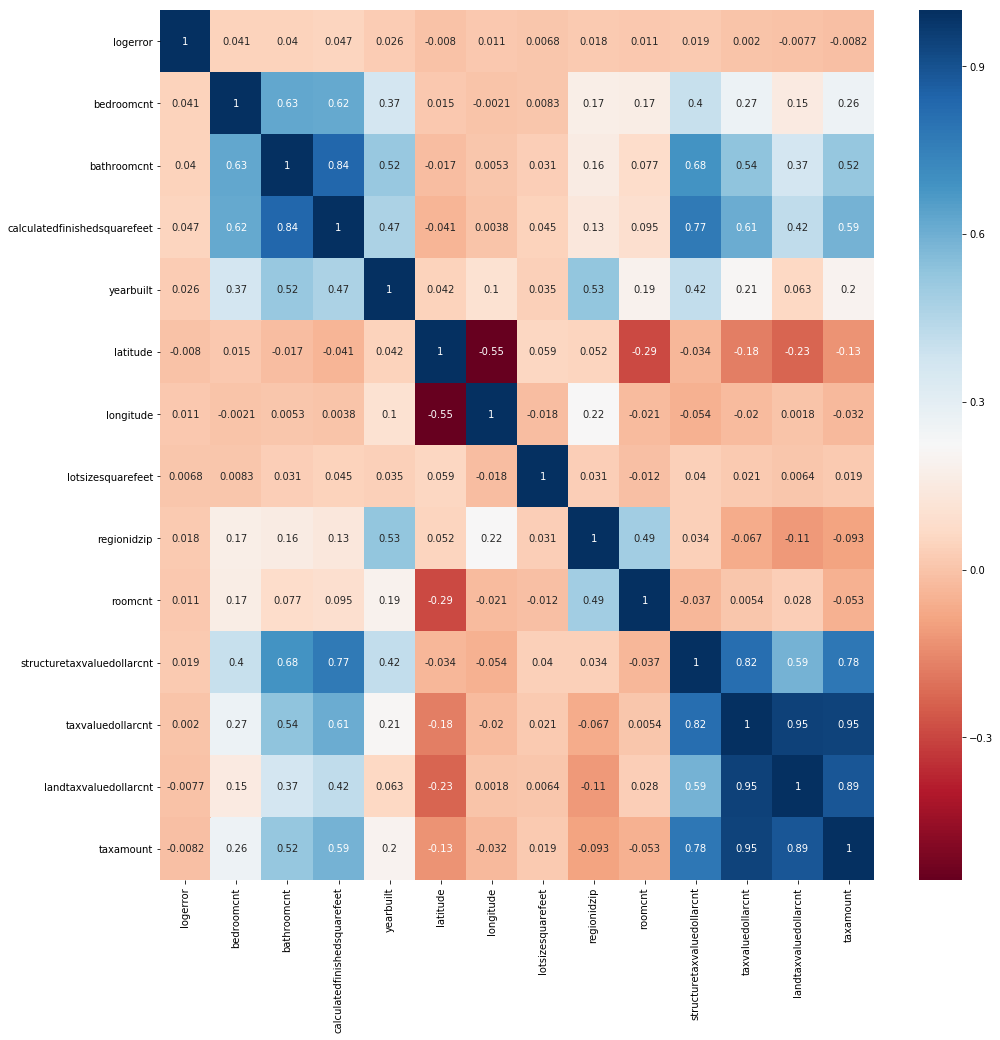

In [190]:
plt.figure(figsize=(16,16))
sns.heatmap(heatmap_df.corr(), cmap='RdBu', annot=True)

In [57]:
# sns.pairplot(heatmap_df)

Write a function that will use seaborn's relplot to plot 2 numeric (ordered) variables and 1 categorical variable. It will take, as input, a dataframe, column name indicated for each of the following: x, y, & hue.

In [143]:
def relplot_fun(x_axis, y_axis, hue, dataframe, palette):
    return sns.relplot(x=x_axis, y=y_axis, hue=hue, data=dataframe, palette=palette)

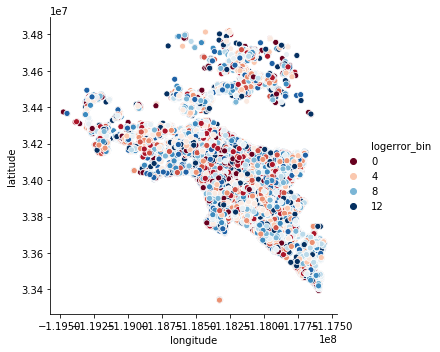

In [192]:
relplot_fun('longitude', 'latitude', 'logerror_bin', df, 'RdBu')

#### Thought: Plot latitude and longitude to basically create a map.  Check to see if the extreme ends of logerror are closer to the coast.  The thought is that the location of the home plays a big role in this.

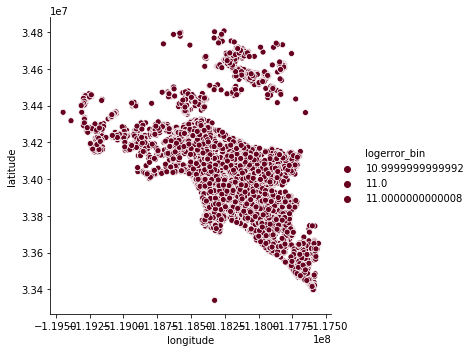

In [193]:
relplot_fun('longitude', 'latitude', df[df.logerror_bin == 11].logerror_bin, df, 'RdBu')

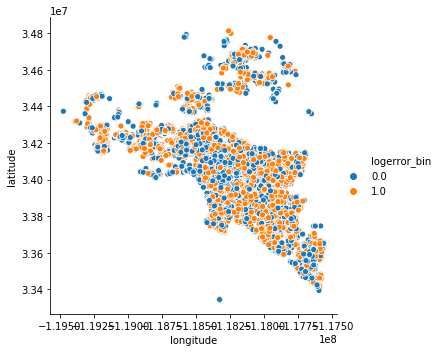

In [194]:
sns.relplot(x='longitude', y='latitude', hue=df[df.logerror_bin <= 1].logerror_bin, data=df)

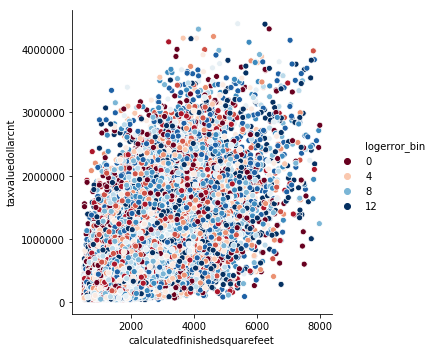

In [195]:
sns.relplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue='logerror_bin', data=df, palette='RdBu')

#### Let's compare, for houses with 6 or more bedrooms, how they look plotted with sqft and taxvalue with the hue of logerror.  

TypeError: invalid type comparison

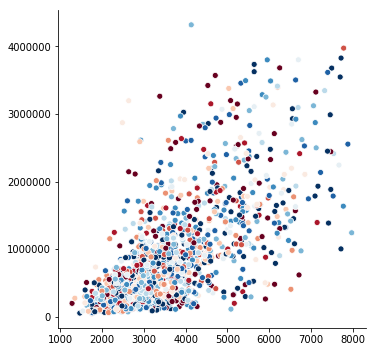

In [196]:
sns.relplot(x=df[df.bedroomcnt >= 6].calculatedfinishedsquarefeet, y=df[df.bedroomcnt >= 6].taxvaluedollarcnt, hue='logerror_bin', data=df, palette='RdBu')

Write a function that will take, as input, a dataframe, a categorical column name, and a list of numeric column names. It will return a series of subplots: a swarmplot for each numeric column. X will be the categorical variable.

In [109]:
swarm_continuous_var = ['calculatedfinishedsquarefeet']

In [166]:
def swarmplot_fun(x, y, data, hue, palette):
    for i,col in enumerate(y):
        plot_number =  i + 1
        series= data[col]
        plt.figure(figsize=(18, 18))
        return sns.swarmplot(x=x, y=col, data=data, hue=hue, palette=palette)

In [111]:
# swarmplot_fun('bedroomcnt_bin', swarm_continuous_var, df, 'logerror_extremes_bin', 'RdBu')

Write a function that will take a dataframe and a list of categorical columns to plot each combination of variables in the chart type of your choice.

In [145]:
def jointplot_fun(x, y, data):   
    for i, col in enumerate(x):
        with sns.axes_style('white'):
            plot_number = i + 1
            series = df[col]
            j = sns.jointplot(x=df[col], y=y, data=df, kind='reg', height=5)
            j.annotate(stats.pearsonr)

In [80]:
jp_continuous_var = ['calculatedfinishedsquarefeet',
 'transactiondate',
 'yearbuilt',
 'lotsizesquarefeet',
 'regionidzip',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']
jointplot_fun(jp_continuous_var, 'logerror', df,)

NameError: name 'jointplot_fun' is not defined

### Sqft looks to have very extreme logerrors at the low end, possibly very small homes < 800 sqft or so.   The same goes for lot size.  Additionally, the low structuretaxvalues , taxvalue, and landtaxvalue seem to also have logerrors towards the extremes.  These combined hint that there is a possibility that the smallest homes may contain the logerrors that are farther from 0.  What can be driving those?  Is it the size alone?

Explore, explore, explore! Use the functions you wrote above to create plots, and explore some more with other plots.

In [202]:
df.describe().T

count          mean           std  \
parcelid                          107149.0  1.299494e+07  2.528371e+06   
logerror                          107149.0  1.443288e-02  1.610520e-01   
bedroomcnt                        107149.0  3.319116e+00  8.924584e-01   
bathroomcnt                       107149.0  2.302355e+00  9.353301e-01   
calculatedfinishedsquarefeet      107149.0  1.904861e+03  8.770600e+02   
transactiondate                   107149.0  2.016521e+07  4.955056e+03   
yearbuilt                         107149.0  1.963957e+03  2.247640e+01   
latitude                          107149.0  3.402149e+07  2.759448e+05   
longitude                         107149.0 -1.181903e+08  3.599116e+05   
calculatedbathnbr                 107149.0  2.302355e+00  9.353301e-01   
fullbathcnt                       107149.0  2.235289e+00  9.120380e-01   
lotsizesquarefeet                 107149.0  1.104254e+04  8.468260e+04   
regionidzip                       107149.0  9.657800e+04  4.193624e+02   
roomcnt                           107149.0  1.965207e+00  3.182551e+00   
structuretaxvaluedollarcnt        107149.0  1.830208e+05  1.742176e+05   
taxvaluedollarcnt                 107149.0  4.799604e+05  4.355873e+05   
landtaxvaluedollarcnt             107149.0  2.969395e+05  3.098105e+05   
taxamount                         107149.0  6.076511e+03  5.268387e+03   
transactiondate_bin               107149.0  3.491036e+00  2.290863e+00   
yearbuilt_bin                     107149.0  5.395272e+00  3.482736e+00   
latitude_bin                      107149.0  5.499949e+00  3.452093e+00   
longitude_bin                     107149.0  5.499930e+00  3.452096e+00   
lotsizesquarefeet_bin             107149.0  5.498595e+00  3.451896e+00   
structuretaxvaluedollarcnt_bin    107149.0  5.499921e+00  3.452161e+00   
landtaxvaluedollarcnt_bin         107149.0  5.499799e+00  3.451972e+00   
taxamount_bin                     107149.0  5.499967e+00  3.452102e+00   
calculatedfinishedsquarefeet_bin  107149.0  5.495516e+00  3.454788e+00   
logerror_bin                      107149.0  5.491820e+00  3.450437e+00   

                                           min           25%           50%  \
parcelid                          1.071174e+07  1.150601e+07  1.263826e+07   
logerror                         -4.655420e+00 -2.519546e-02  6.000000e-03   
bedroomcnt                        1.000000e+00  3.000000e+00  3.000000e+00   
bathroomcnt                       1.000000e+00  2.000000e+00  2.000000e+00   
calculatedfinishedsquarefeet      5.000000e+02  1.296000e+03  1.674000e+03   
transactiondate                   2.016010e+07  2.016061e+07  2.016101e+07   
yearbuilt                         1.880000e+03  1.951000e+03  1.961000e+03   
latitude                          3.334004e+07  3.382265e+07  3.402204e+07   
longitude                        -1.194753e+08 -1.184003e+08 -1.181427e+08   
calculatedbathnbr                 1.000000e+00  2.000000e+00  2.000000e+00   
fullbathcnt                       1.000000e+00  2.000000e+00  2.000000e+00   
lotsizesquarefeet                 2.360000e+02  5.615000e+03  6.857000e+03   
regionidzip                       9.598200e+04  9.621300e+04  9.642400e+04   
roomcnt                           0.000000e+00  0.000000e+00  0.000000e+00   
structuretaxvaluedollarcnt        2.500000e+04  7.989900e+04  1.319950e+05   
taxvaluedollarcnt                 3.615200e+04  2.050790e+05  3.710330e+05   
landtaxvaluedollarcnt             1.009300e+04  8.528100e+04  2.174020e+05   
taxamount                         4.908000e+01  2.931880e+03  4.780900e+03   
transactiondate_bin               0.000000e+00  1.000000e+00  3.000000e+00   
yearbuilt_bin                     0.000000e+00  2.000000e+00  5.000000e+00   
latitude_bin                      0.000000e+00  2.000000e+00  5.000000e+00   
longitude_bin                     0.000000e+00  2.000000e+00  5.000000e+00   
lotsizesquarefeet_bin             0.000000e+00  2.000000e+00  5.000000e+00   
structuretaxvalued

# First exploration iteration: All using entire population.
# Note: Rerun these, or something similar, in clusters.

Test, test, test!
logerror is normally distributed, so it is a great opportunity to use the t-test to test for significant differences in the logerror by creating sample groups based on various variables. e.g. Is logerror significantly different for properties in Los Angeles County vs Orange County (or Ventura County)? Is logerror significantly different for properties that are delinquent on their taxes vs those that are not? Is logerror significantly different for properties built prior to 1960 than those built later than 2000?

Let's see if we see a difference in logerror among homes with 3 or less bedrooms vs. homes with 6 or more bedrooms.

In [198]:
stats.ttest_ind(df[df.bedroomcnt <= 3].logerror, df[df.bedroomcnt >= 6].logerror)

Ttest_indResult(statistic=-6.857618550895316, pvalue=7.062223048526154e-12)

### This supports the hypothesis that logerror for homes with 3 and under bedrooms is significantly different than those homes with 6+ homes.  The very low p-value indicates these two populations are not similar.

#### We seem to keep seeing small homes as something harder to predict.  Let's compare logerror for homes under 3 bedrooms to homes with 3+ bedrooms.

In [199]:
stats.ttest_ind(df[df.bedroomcnt < 3].logerror, df[df.bedroomcnt >= 3].logerror)

Ttest_indResult(statistic=-7.970424808228705, pvalue=1.5967229304054647e-15)

#### There seems to be something there.  This might be a group that we pull out and try and figure out what's so different about them.

Let's compare pre 1960 homes to post 2000.

In [200]:
stats.ttest_ind(df[df.yearbuilt <= 1960].logerror, df[df.yearbuilt >= 2000].logerror)

Ttest_indResult(statistic=-4.951494901326125, pvalue=7.384158882905395e-07)

### This supports the hypothesis that logerror for homes built before 1960 is significantly different than those homes built after 2000.  The very low p-value indicates these two populations are not similar.

Let's check logerror between homes under 1,250 sq. ft and over 4,500 sq. ft.

In [201]:
stats.ttest_ind(df[df.calculatedfinishedsquarefeet <= 1250].logerror, df[df.calculatedfinishedsquarefeet >= 4500].logerror)

Ttest_indResult(statistic=-9.07869323149677, pvalue=1.1767795615781878e-19)

### This supports the hypothesis that logerror for homes under 1,250 sq. ft. is significantly different than those homes that are over 4,500 sq. ft. The very low p-value indicates these two populations are not similar.

Let's compare homes with a taxvalue under $125k vs homes over $1 million.

In [203]:
stats.ttest_ind(df[df.taxvaluedollarcnt <= 125000].logerror, df[df.taxvaluedollarcnt >= 1000000].logerror)

Ttest_indResult(statistic=0.47605107244373907, pvalue=0.6340422544185922)

This resulted in a high p-value indicated that there is no significant difference in logerror between these two groups.

Let's try looking at landtaxvalue on the extreme ends.

In [205]:
stats.ttest_ind(df[df.landtaxvaluedollarcnt <= 70000].logerror, df[df.landtaxvaluedollarcnt >= 2000000].logerror)

Ttest_indResult(statistic=0.9829153271879135, pvalue=0.3256588959874911)

This resulted in a high p-value indicated that there is no significant difference in logerror between these two groups.

#### Let's do a crosstab on our two with very low p-values to see how they compare from actual to expected.

In [185]:
tbl = pd.crosstab(df['bedroomcnt_bin'], df['logerror_bin'])
tbl

logerror_bin      0     1     2     3     4     5     6     7     8     9   \
bedroomcnt_bin                                                               
1               2249  1652  1381  1284  1149  1153  1136  1207  1334  1344   
2               4013  4255  4369  4236  4213  4420  4171  3864  3961  3894   
3               2587  2924  3107  3330  3486  3630  3577  3372  3527  3641   
4                110    69    72    79    80    84    85    89   107   139   

logerror_bin      10    11  
bedroomcnt_bin              
1               1382  1669  
2               3646  3767  
3               3660  3291  
4                152   202

In [179]:
pd.crosstab(df.bedroomcnt_bin, df.logerror_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [186]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

6.126996010880593e-280

In [209]:
tbl = pd.crosstab(df['bedroomcnt_bin'], df['logerror_extremes_bin'])
tbl

logerror_extremes_bin  1  2      3   4  5
bedroomcnt_bin                           
1                      0  0  16938   2  0
2                      4  1  48792  12  0
3                      1  0  40122   8  1
4                      0  0   1268   0  0

In [210]:
pd.crosstab(df.bedroomcnt_bin, df.logerror_extremes_bin, margins=True).style.background_gradient(cmap='YlOrRd')

### Bedroomcnt group 3 seems to have a high number of higher logerrors.

In [211]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.8761094362579147

In [247]:
tbl = pd.crosstab(df['bedroomcnt'], df['logerror_bin'])
tbl

logerror_bin    0     1     2     3     4     5     6     7     8     9   \
bedroomcnt                                                                 
1.0            154    73    60    46    38    43    51    54    69    90   
2.0           2095  1579  1321  1238  1111  1110  1085  1153  1265  1254   
3.0           4013  4255  4369  4236  4213  4420  4171  3864  3961  3894   
4.0           2097  2437  2566  2753  2884  2948  2906  2726  2814  2830   
5.0            490   487   541   577   602   682   671   646   713   811   
6.0             91    63    63    72    73    78    73    78    94   127   
7.0             19     6     9     7     7     6    12    11    13    12   

logerror_bin    10    11  
bedroomcnt                
1.0            102   143  
2.0           1280  1526  
3.0           3646  3767  
4.0           2730  2481  
5.0            930   810  
6.0            130   166  
7.0             22    36

In [248]:
pd.crosstab(df.bedroomcnt, df.logerror_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [249]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.0

In [250]:
pd.crosstab(df.bedroomcnt, df.logerror_quartiles, margins=True).style.background_gradient(cmap='YlOrRd')

#### Looking at 6 and 7 bedrooms, they tend to have a lot of homes in the upper quartile of logerror.  One bedrooms seems to have a lot more in lower and upper quartiles.  5 bedrooms are starting to sway toward upper quartile as well.

In [251]:
tbl = pd.crosstab(df['bedroomcnt'], df['logerror_extremes_bin'])
tbl

logerror_extremes_bin  1  2      3   4  5
bedroomcnt                               
1.0                    0  0    922   1  0
2.0                    0  0  16016   1  0
3.0                    4  1  48792  12  0
4.0                    1  0  32167   3  1
5.0                    0  0   7955   5  0
6.0                    0  0   1108   0  0
7.0                    0  0    160   0  0

In [252]:
pd.crosstab(df.bedroomcnt, df.logerror_extremes_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [212]:
tbl = pd.crosstab(df['yearbuilt_bin'], df['logerror_bin'])
tbl

logerror_bin     0     1    2    3    4     5    6    7    8    9    10    11
yearbuilt_bin                                                                
0              1584   974  666  602  487   519  515  544  644  732  800  1108
1              1419  1037  921  670  638   684  612  693  786  852  945  1029
2               991   964  819  736  749   723  695  709  731  776  841   875
3               784   831  795  771  728   644  703  641  662  662  594   764
4               763   885  861  796  709   756  700  646  711  712  690   792
5               573   636  661  638  602   632  590  561  600  637  572   676
6               544   689  799  773  817   856  787  749  788  801  756   746
7               461   618  669  768  763   832  827  721  746  701  673   588
8               480   605  743  764  877   912  869  805  833  860  796   636
9               568   695  754  917  924  1026  978  899  875  827  793   697
10              384   471  609  706  817   791  779  724  748  661  637   462
11              408   495  632  788  817   912  914  840  805  797  743   556

In [213]:
pd.crosstab(df.yearbuilt_bin, df.logerror_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [214]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.0

In [236]:
pd.crosstab(df.yearbuilt_bin, df.logerror_quartiles, margins=True).style.background_gradient(cmap='YlOrRd')

In [215]:
tbl = pd.crosstab(df['yearbuilt_bin'], df['logerror_extremes_bin'])
tbl

logerror_extremes_bin  1  2      3  4  5
yearbuilt_bin                           
0                      0  1   9171  3  0
1                      2  0  10280  4  0
2                      0  0   9608  1  0
3                      1  0   8576  2  0
4                      0  0   9021  0  0
5                      0  0   7376  2  0
6                      0  0   9101  3  1
7                      0  0   8365  2  0
8                      0  0   9179  1  0
9                      1  0   9951  1  0
10                     1  0   7787  1  0
11                     0  0   8705  2  0

In [216]:
pd.crosstab(df.yearbuilt_bin, df.logerror_extremes_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [217]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.6861124153000181

In [218]:
tbl = pd.crosstab(df['fips'], df['logerror_bin'])
tbl

logerror_bin    0     1     2     3     4     5     6     7     8     9   \
fips                                                                       
6037.0        6875  6305  5772  5367  5149  5360  5111  5146  5485  5607   
6059.0        1569  1907  2394  2727  2860  3006  2994  2575  2657  2617   
6111.0         515   688   763   835   919   921   864   811   787   794   

logerror_bin    10    11  
fips                      
6037.0        5806  6233  
6059.0        2349  2078  
6111.0         685   618

In [219]:
pd.crosstab(df.fips, df.logerror_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [220]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.0

In [237]:
pd.crosstab(df.fips, df.logerror_quartiles, margins=True).style.background_gradient(cmap='YlOrRd')

In [221]:
tbl = pd.crosstab(df['fips'], df['logerror_extremes_bin'])
tbl

logerror_extremes_bin  1  2      3   4  5
fips                                     
6037.0                 4  0  68193  18  1
6059.0                 0  1  29729   3  0
6111.0                 1  0   9198   1  0

In [222]:
pd.crosstab(df.fips, df.logerror_extremes_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [223]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.37114297652992584

In [224]:
tbl = pd.crosstab(df['calculatedfinishedsquarefeet_bin'], df['logerror_bin'])
tbl

logerror_bin                        0    1    2    3    4    5    6    7   \
calculatedfinishedsquarefeet_bin                                            
0                                 1122  881  782  708  624  633  618  625   
1                                  909  864  863  795  730  771  688  641   
2                                  812  913  855  803  750  774  749  656   
3                                  767  844  768  818  808  795  734  661   
4                                  716  846  883  813  741  786  795  708   
5                                  721  780  768  786  782  799  786  735   
6                                  655  754  788  764  794  803  773  744   
7                                  625  699  746  768  759  871  820  808   
8                                  603  607  706  723  834  821  787  800   
9                                  645  598  614  717  792  840  802  790   
10                                 641  574  575  665  726  788  801  734   
11                                 743  540  581  569  588  606  616  630   

logerror_bin                       8    9     10    11  
calculatedfinishedsquarefeet_bin                        
0                                 679  661   678   956  
1                                 697  626   610   814  
2                                 659  670   571   723  
3                                 679  624   644   683  
4                                 712  704   637   670  
5                                 723  687   645   648  
6                                 759  774   650   639  
7                                 802  739   675   642  
8                                 832  832   760   613  
9                                 806  855   804   661  
10                                861  901   891   771  
11                                720  945  1275  1109

In [225]:
pd.crosstab(df.calculatedfinishedsquarefeet_bin, df.logerror_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [226]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.0

In [238]:
pd.crosstab(df.calculatedfinishedsquarefeet_bin, df.logerror_quartiles, margins=True).style.background_gradient(cmap='YlOrRd')

In [227]:
tbl = pd.crosstab(df['calculatedfinishedsquarefeet_bin'], df['logerror_extremes_bin'])
tbl

logerror_extremes_bin             1  2     3  4  5
calculatedfinishedsquarefeet_bin                  
0                                 1  0  8965  1  0
1                                 0  0  9006  2  0
2                                 1  0  8930  4  0
3                                 0  0  8825  0  0
4                                 2  0  9008  1  0
5                                 0  0  8858  2  0
6                                 0  0  8897  0  0
7                                 1  0  8951  2  0
8                                 0  1  8915  2  0
9                                 0  0  8923  1  0
10                                0  0  8925  2  1
11                                0  0  8917  5  0

In [228]:
pd.crosstab(df.calculatedfinishedsquarefeet_bin, df.logerror_extremes_bin, margins=True).style.background_gradient(cmap='YlOrRd')

In [229]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.3653057350430978

#### Looking above, there seem to be a high number, 11 total, of homes above 2.5 logerror in the two buckets of larger homes.

# May need to change.  3 bedrooms have more extreme logerros looking above at bedroom count chi tests.

# 1 and 2 Bedrooms: Let's do some visualations.

In [274]:
less_than_three_beds = df[df.bedroomcnt <= 2]
less_than_three_beds.shape

(16940, 41)

In [275]:
less_than_three_beds.describe().T

count          mean           std  \
parcelid                          16940.0  1.255006e+07  1.398457e+06   
logerror                          16940.0  5.386077e-03  1.735571e-01   
bedroomcnt                        16940.0  1.945514e+00  2.269817e-01   
bathroomcnt                       16940.0  1.450118e+00  5.887922e-01   
calculatedfinishedsquarefeet      16940.0  1.207544e+03  4.206857e+02   
transactiondate                   16940.0  2.016520e+07  4.954137e+03   
yearbuilt                         16940.0  1.947261e+03  1.997211e+01   
latitude                          16940.0  3.400101e+07  2.231850e+05   
longitude                         16940.0 -1.182022e+08  2.943409e+05   
calculatedbathnbr                 16940.0  1.450118e+00  5.887922e-01   
fullbathcnt                       16940.0  1.422491e+00  5.708150e-01   
lotsizesquarefeet                 16940.0  1.159915e+04  1.354423e+05   
regionidzip                       16940.0  9.640633e+04  3.828854e+02   
roomcnt                           16940.0  9.837662e-01  2.032276e+00   
structuretaxvaluedollarcnt        16940.0  1.040843e+05  8.562162e+04   
taxvaluedollarcnt                 16940.0  3.637834e+05  3.065126e+05   
landtaxvaluedollarcnt             16940.0  2.596992e+05  2.494175e+05   
taxamount                         16940.0  4.752161e+03  3.874475e+03   
transactiondate_bin               16940.0  3.467237e+00  2.288646e+00   
yearbuilt_bin                     16940.0  2.705785e+00  2.963816e+00   
latitude_bin                      16940.0  5.346458e+00  2.935757e+00   
longitude_bin                     16940.0  5.159917e+00  2.864656e+00   
lotsizesquarefeet_bin             16940.0  3.903483e+00  3.371880e+00   
structuretaxvaluedollarcnt_bin    16940.0  3.332586e+00  2.821345e+00   
landtaxvaluedollarcnt_bin         16940.0  5.265584e+00  3.117607e+00   
taxamount_bin                     16940.0  4.476151e+00  3.155581e+00   
calculatedfinishedsquarefeet_bin  16940.0  2.069067e+00  2.474323e+00   
logerror_bin                      16940.0  5.244333e+00  3.720469e+00   
logerror_quartiles                16940.0  1.424144e+00  1.177638e+00   
cluster_target                    16940.0  2.239965e+00  1.215383e+00   
cluster_target                    16940.0  2.469599e+00  1.844081e+00   
bed_yr_tax_clust                  16940.0  2.027863e+00  1.514962e+00   

                                           min           25%           50%  \
parcelid                          1.071317e+07  1.166663e+07  1.222455e+07   
logerror                         -2.331727e+00 -3.802664e-02  3.316027e-03   
bedroomcnt                        1.000000e+00  2.000000e+00  2.000000e+00   
bathroomcnt                       1.000000e+00  1.000000e+00  1.000000e+00   
calculatedfinishedsquarefeet      5.000000e+02  9.060000e+02  1.125000e+03   
transactiondate                   2.016010e+07  2.016060e+07  2.016101e+07   
yearbuilt                         1.882000e+03  1.934000e+03  1.948000e+03   
latitude                          3.334004e+07  3.386172e+07  3.401313e+07   
longitude                        -1.194479e+08 -1.183541e+08 -1.182007e+08   
calculatedbathnbr                 1.000000e+00  1.000000e+00  1.000000e+00   
fullbathcnt                       1.000000e+00  1.000000e+00  1.000000e+00   
lotsizesquarefeet                 4.800000e+02  4.723750e+03  5.939000e+03   
regionidzip                       9.598200e+04  9.610700e+04  9.627100e+04   
roomcnt                           0.000000e+00  0.000000e+00  0.000000e+00   
structuretaxvaluedollarcnt        2.500000e+04  5.538400e+04  8.381400e+04   
taxvaluedollarcnt                 3.615200e+04  1.745182e+05  2.895415e+05   
landtaxvaluedollarcnt             1.012100e+04  9.817525e+04  1.998825e+05   
taxamount                         1.429800e+02  2.495258e+03  3.860645e+03   
transactiondate_bin               0.000000e+00  1.000000e+00  3.000000e+00   
yearbuilt_bin                     0.000000e+00  1.000000e+00  2.00

### What stands out?  A 1 or 2 bedroom that is 5,332 sq. ft.?  5 bathrooms? Almost 7 million sq. ft. lot? 

In [276]:
def sort_col_val():
    df = less_than_three_beds
    df_cols = less_than_three_beds.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head(5).T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail(5).T)
        print('-----')

In [38]:
sort_col_val()

Sorted by parcelid:
Head:
            3406      72098     105711    1827      109953
parcelid  10713169  10713552  10713611  10713717  10713765
 
Tail: 
            111549    117137    40345     56400     145684
parcelid  17295602  17295668  17295668  17296253  17299044
-----
Sorted by logerror:
Head:
            157576  43888   63415     125915  8660  
logerror -2.331727  -2.293  -2.254 -2.211811  -1.784
 
Tail: 
            154871    139795  12992     135163    167574
logerror  2.263294  2.282956   2.413  2.536896  2.957147
-----
Sorted by bedroomcnt:
Head:
            155787  78521   138748  18760   131293
bedroomcnt     1.0     1.0     1.0     1.0     1.0
 
Tail: 
            57467   57479   57491   57850   167850
bedroomcnt     2.0     2.0     2.0     2.0     2.0
-----
Sorted by bathroomcnt:
Head:
             59584  75775  75793  75799  75802
bathroomcnt    1.0    1.0    1.0    1.0    1.0
 
Tail: 
             87589   49614   47999   103218  90515 
bathroomcnt     4.0     4.5    

## Let's check out our subgroup of 1 and 2 bedrooms and see if we can find some clusters based on yearbuilt, taxvaluedollarcnt, and regionidzip.

In [277]:
X_under_three_bed_yr_tax_zip = less_than_three_beds[['yearbuilt', 'taxvaluedollarcnt', 'regionidzip']]
X_under_three_bed_yr_tax_zip.head()

yearbuilt  taxvaluedollarcnt  regionidzip
2      1940.0           119906.0      96293.0
6      1939.0           111521.0      96091.0
10     1954.0           105954.0      96426.0
14     1955.0           254817.0      97035.0
20     1927.0           260249.0      96239.0

In [278]:
estimators = [('8 Clusters', KMeans(n_clusters=8)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('5 Clusters', KMeans(n_clusters=5))]

<IPython.core.display.Javascript object>


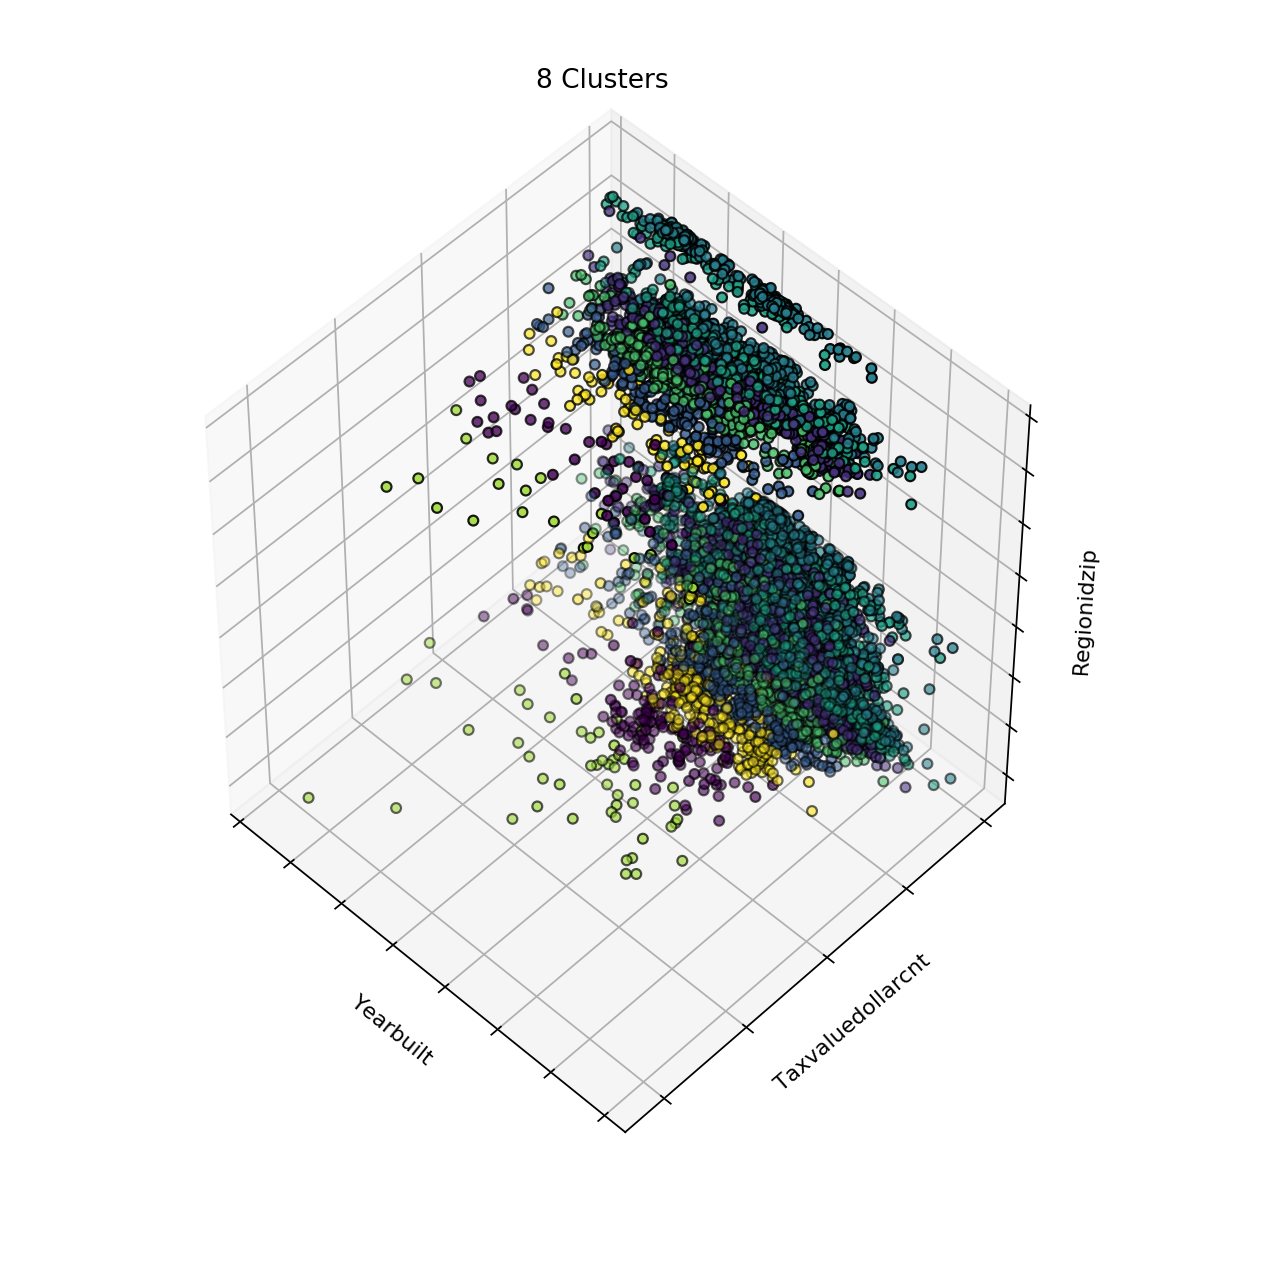

<IPython.core.display.Javascript object>


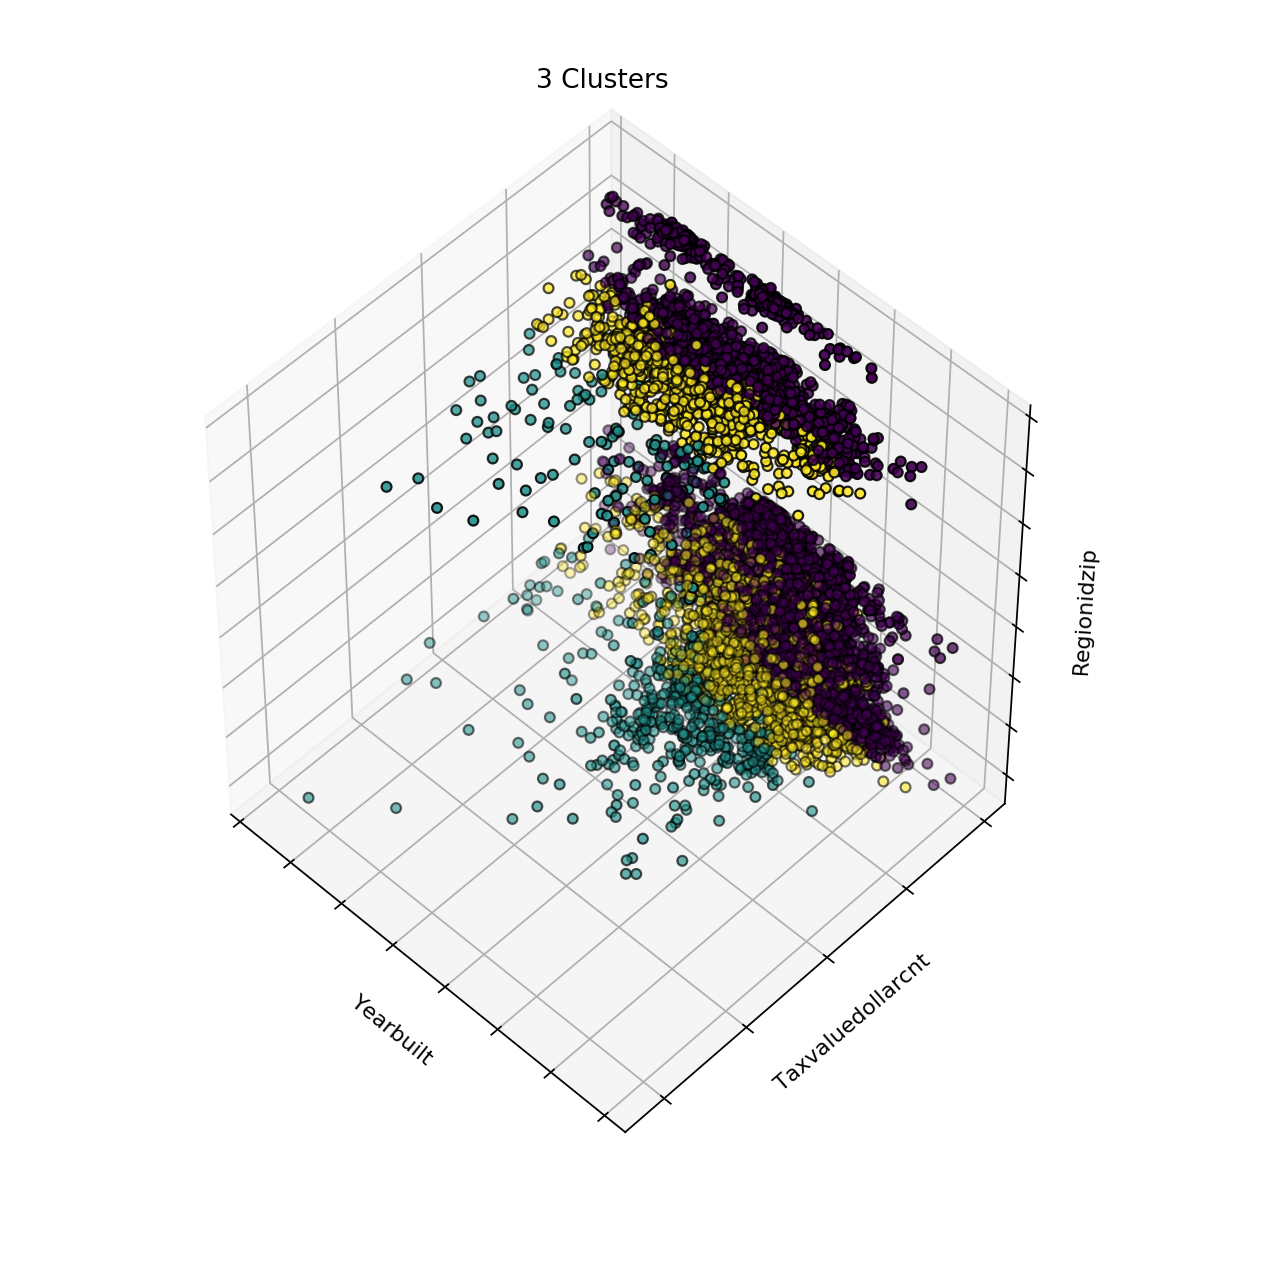

<IPython.core.display.Javascript object>


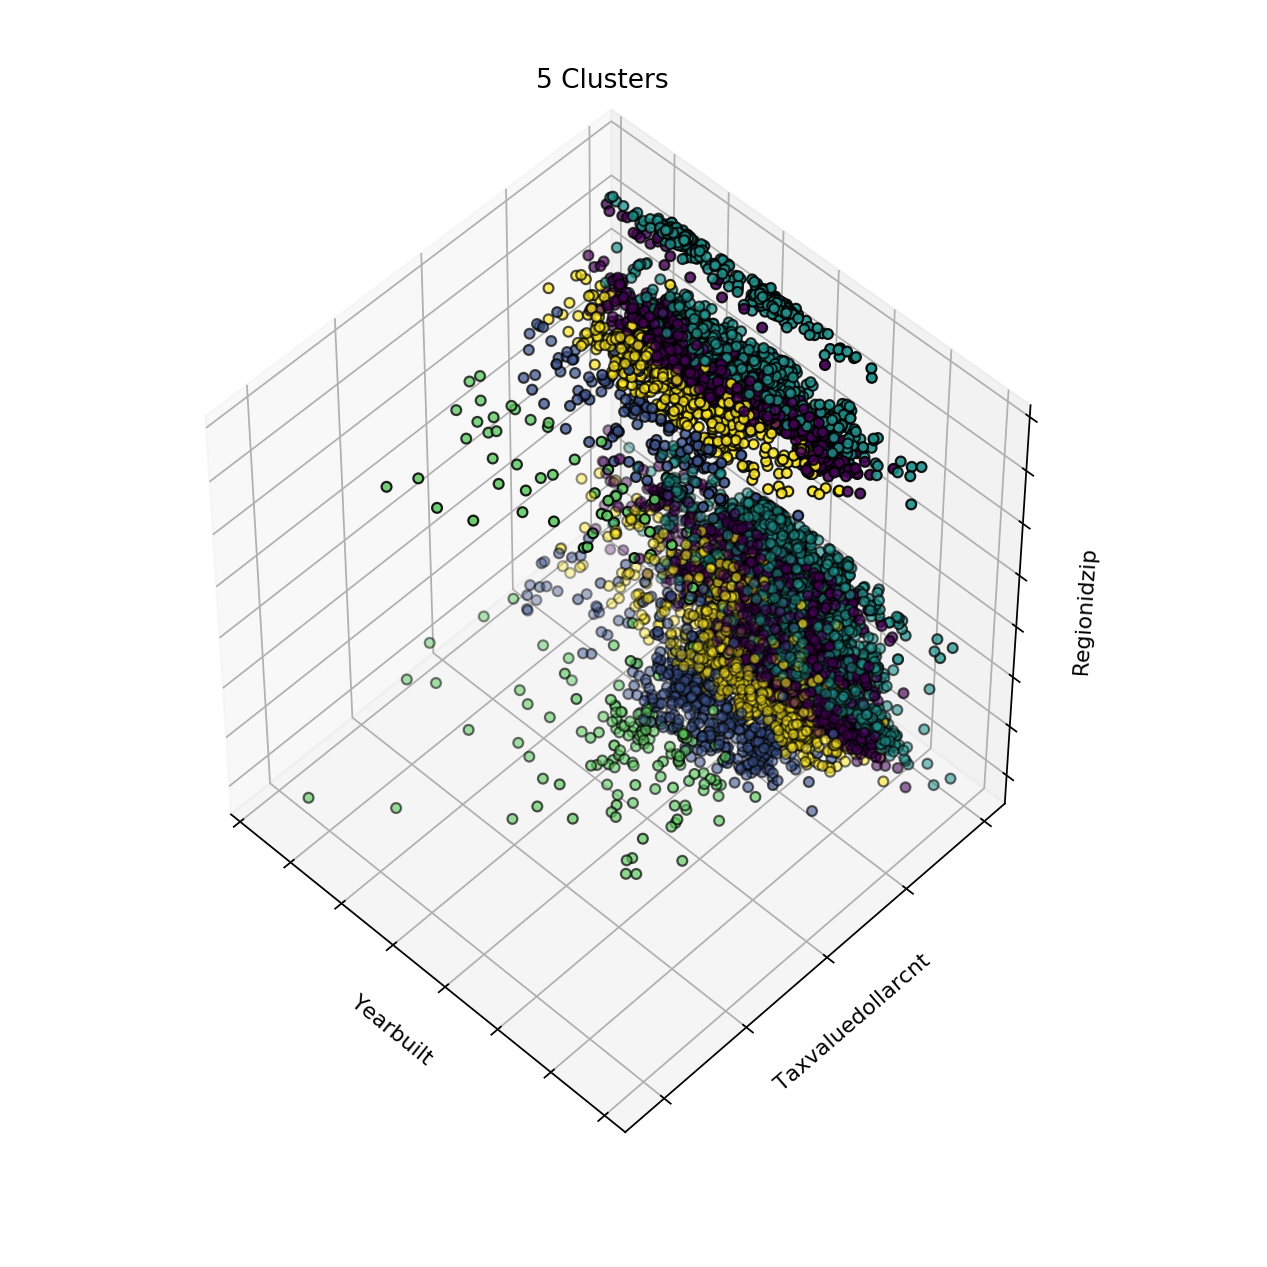

In [283]:
%matplotlib notebook

for i, (title, kmeans) in enumerate(estimators):
    # fit the model
    kmeans.fit(X_under_three_bed_yr_tax_zip)

    labels = kmeans.labels_

    # setup the 3d plot
    fignum = i + 1
    fig = plt.figure(fignum, figsize=(8,8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # plot the points
    ax.scatter(X_under_three_bed_yr_tax_zip.yearbuilt, X_under_three_bed_yr_tax_zip.taxvaluedollarcnt, X_under_three_bed_yr_tax_zip.regionidzip,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    ax.set_xlabel('Yearbuilt')
    ax.set_ylabel('Taxvaluedollarcnt')
    ax.set_zlabel('Regionidzip')

    ax.set_title(title)
    ax.dist = 12

Because there are many discrete variables, you can the chi-squared test to test proportions. If you split logerror into quartiles, you can expect the overall probability of falling into a single quartile to be 25%. Now, add another variable, like bedrooms (and you can bin these if you want fewer distinct values) and compare the probabilities of bedrooms with logerror quartiles. See the example in the Classification_Project notebook we reviewed on how to implement chi-squared.

# Modeling Clusters

## Logerror only:

In [129]:
# X_logerror_only = df[['logerror']]
# X_logerror_only.shape

(107149, 1)

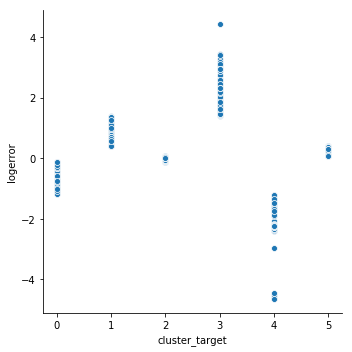

In [130]:
# kmeans = KMeans(n_clusters=6)
# kmeans.fit(X_logerror_only)
# X_logerror_only['cluster_target'] = kmeans.predict(X_logerror_only)
# sns.relplot(data=X_logerror_only, x='cluster_target', y='logerror')

In [131]:
# X_logerror_only.rename(index=str, columns={'logerror':'logerror_X'}, inplace=True)
# X_logerror_only.head()

logerror  cluster_target
0    0.0276               2
1   -0.1684               0
2   -0.0040               2
4   -0.0050               2
5   -0.2705               0

In [123]:
# df.head()

parcelid  logerror  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0  11016594    0.0276         3.0          2.0                        1684.0   
1  14366692   -0.1684         4.0          3.5                        2263.0   
2  12098116   -0.0040         2.0          3.0                        2217.0   
4  14432541   -0.0050         4.0          2.5                        2283.0   
5  11509835   -0.2705         4.0          4.0                        3067.0   

   transactiondate  yearbuilt    fips    latitude    longitude  \
0         20160101     1959.0  6037.0  34280990.0 -118488536.0   
1         20160101     2014.0  6059.0  33668120.0 -117677556.0   
2         20160101     1940.0  6037.0  34136312.0 -118175032.0   
4         20160102     1981.0  6059.0  33485643.0 -117700234.0   
5         20160102     1982.0  6037.0  33870089.0 -118402768.0   

          ...          latitude_bin  longitude_bin  lotsizesquarefeet_bin  \
0         ...                    10              2                      7   
1         ...                     1             11                      0   
2         ...                     7              5                     10   
4         ...                     0             11                      3   
5         ...                     3              2                      0   

  structuretaxvaluedollarcnt_bin landtaxvaluedollarcnt_bin taxamount_bin  \
0                              5                         6             8   
1                             10                         6            10   
2                              1                         2            10   
4                              7                         6             7   
5                             11                        11            11   

  calculatedfinishedsquarefeet_bin  logerror_bin  logerror_extremes_bin  \
0                                6             8                      3   
1                                8             0                      3   
2                                8             4                      3   
4                                8             4                      3   
5                               10             0                      3   

   logerror_quartiles  
0                   2  
1                   0  
2                   1  
4                   1  
5                   0  

[5 rows x 38 columns]

In [133]:
# X_logerror_only.head()

logerror  cluster_target
0    0.0276               2
1   -0.1684               0
2   -0.0040               2
4   -0.0050               2
5   -0.2705               0

In [135]:
# X_logerror_only.drop(['logerror'], axis=1, inplace=True)

In [137]:
# df = pd.concat([df, X_logerror_only], axis=1)
# df.head()

parcelid  logerror  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0  11016594    0.0276         3.0          2.0                        1684.0   
1  14366692   -0.1684         4.0          3.5                        2263.0   
2  12098116   -0.0040         2.0          3.0                        2217.0   
4  14432541   -0.0050         4.0          2.5                        2283.0   
5  11509835   -0.2705         4.0          4.0                        3067.0   

   transactiondate  yearbuilt    fips    latitude    longitude  \
0         20160101     1959.0  6037.0  34280990.0 -118488536.0   
1         20160101     2014.0  6059.0  33668120.0 -117677556.0   
2         20160101     1940.0  6037.0  34136312.0 -118175032.0   
4         20160102     1981.0  6059.0  33485643.0 -117700234.0   
5         20160102     1982.0  6037.0  33870089.0 -118402768.0   

        ...        longitude_bin  lotsizesquarefeet_bin  \
0       ...                    2                      7   
1       ...                   11                      0   
2       ...                    5                     10   
4       ...                   11                      3   
5       ...                    2                      0   

   structuretaxvaluedollarcnt_bin landtaxvaluedollarcnt_bin taxamount_bin  \
0                               5                         6             8   
1                              10                         6            10   
2                               1                         2            10   
4                               7                         6             7   
5                              11                        11            11   

  calculatedfinishedsquarefeet_bin logerror_bin  logerror_extremes_bin  \
0                                6            8                      3   
1                                8            0                      3   
2                                8            4                      3   
4                                8            4                      3   
5                               10            0                      3   

   logerror_quartiles  cluster_target  
0                   2               2  
1                   0               0  
2                   1               2  
4                   1               2  
5                   0               0  

[5 rows x 39 columns]

# Visualizations using logerror clusters

## Swarmplots are taking 3-5 minutes to plot.  First time through, we'll stick with relplots.
### Using swarmplots can help, but we have a lot of observations overall.  Let's split them into bedroomcnts and then check each of them against other variables with the logerror cluster as the hue.

In [138]:
one_and_two_beds = df[df.bedroomcnt <= 2]
one_and_two_beds.shape

(16940, 39)

In [139]:
three_beds = df[df.bedroomcnt == 3]
three_beds.shape

(48809, 39)

In [140]:
four_beds = df[df.bedroomcnt == 4]
four_beds.shape

(32172, 39)

In [142]:
five_plus_beds = df[df.bedroomcnt >= 5]
five_plus_beds.shape

(9228, 39)

In [158]:
five_plus_beds.sample(105).T

112608  \
parcelid                                           13032312   
logerror                                          0.0999473   
bedroomcnt                                                5   
bathroomcnt                                               5   
calculatedfinishedsquarefeet                           4300   
transactiondate                                    20170331   
yearbuilt                                              1989   
fips                                                   6037   
latitude                                        3.41549e+07   
longitude                                      -1.17848e+08   
calculatedbathnbr                                         5   
fullbathcnt                                               5   
lotsizesquarefeet                                     16720   
propertycountylandusecode                              0100   
propertylandusetypeid                                   261   
propertylandusedesc               Single Family Residential   
regionidcounty                                         3101   
regionidzip                                           96486   
roomcnt                                                   0   
structuretaxvaluedollarcnt                            82403   
taxvaluedollarcnt                                    106612   
assessmentyear                                         2016   
landtaxvaluedollarcnt                                 24209   
taxamount                                           1743.21   
bedroomcnt_bin                                            3   
bathroomcnt_bin                                           3   
transactiondate_bin                                       5   
yearbuilt_bin                                             9   
latitude_bin                                              8   
longitude_bin                                             9   
lotsizesquarefeet_bin                                    11   
structuretaxvaluedollarcnt_bin                            3   
landtaxvaluedollarcnt_bin                                 0   
taxamount_bin                                             1   
calculatedfinishedsquarefeet_bin                         11   
logerror_bin                                             10   
logerror_extremes_bin                                     3   
logerror_quartiles                                        3   
cluster_target                                            5   

                                                     56953   \
parcelid                                           17225230   
logerror                                             0.0208   
bedroomcnt                                                5   
bathroomcnt                                             3.5   
calculatedfinishedsquarefeet                           3987   
transactiondate                                    20160718   
yearbuilt                                              1998   
fips                                                   6111   
latitude                                        3.42374e+07   
longitude                                      -1.18801e+08   
calculatedbathnbr                                       3.5   
fullbathcnt                                               3   
lotsizesquarefeet                                     12176   
propertycountylandusecode                              1111   
propertylandusetypeid                                   261   
propertylandusedesc               Single Family Residential   
regionidcounty                                         2061   
regionidzip                                           97118   
roomcnt                                                  10   
structuretaxvaluedollarcnt                           402088   
taxvaluedollarcnt                                    636146   
assessmentyear                                         2015   
landtaxvaluedollarcnt                                234058   
taxamount           

### Using sqft as X and taxvalue as Y and cluster_target as hue.  The graphs are divided up into bedroom counts as well to have fewer observations on each graph.

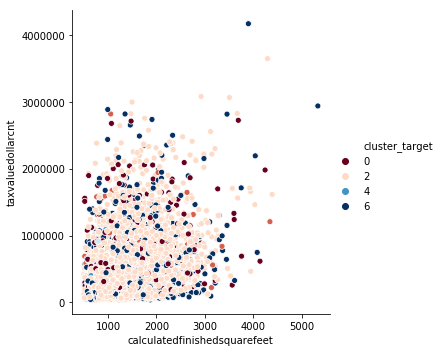

In [169]:
relplot_fun('calculatedfinishedsquarefeet','taxvaluedollarcnt', 'cluster_target', one_and_two_beds, 'RdBu')

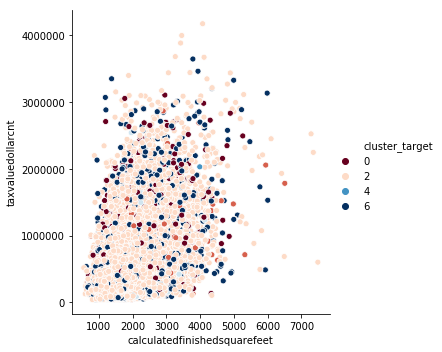

In [171]:
relplot_fun('calculatedfinishedsquarefeet','taxvaluedollarcnt', 'cluster_target', three_beds, 'RdBu')

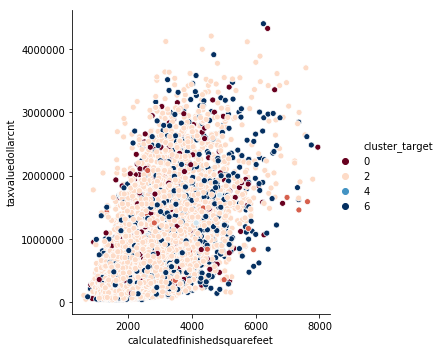

In [172]:
relplot_fun('calculatedfinishedsquarefeet','taxvaluedollarcnt', 'cluster_target', four_beds, 'RdBu')

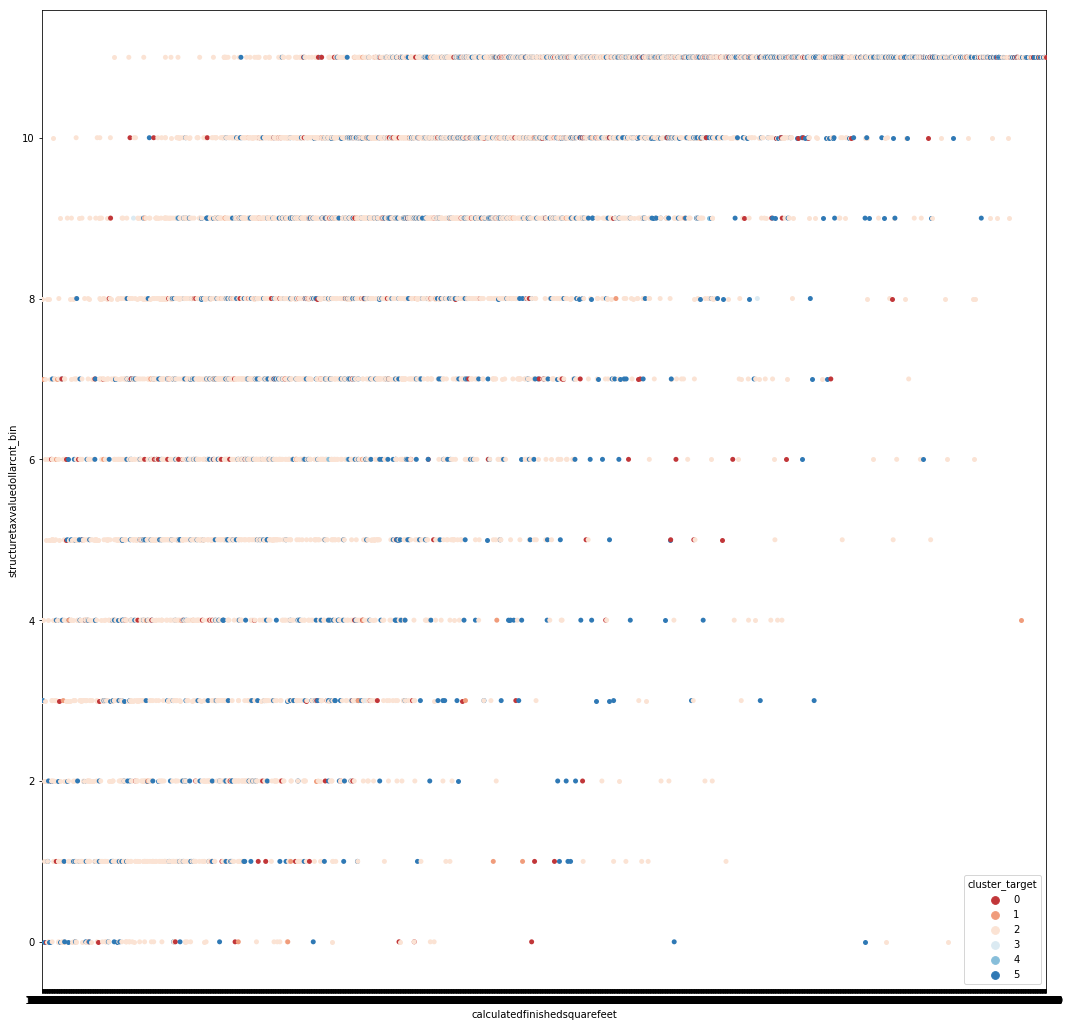

In [167]:
# swarm = ['structuretaxvaluedollarcnt_bin']
# swarmplot_fun('calculatedfinishedsquarefeet', swarm, five_plus_beds, 'cluster_target', 'RdBu')

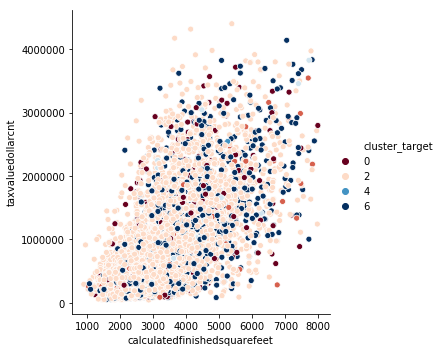

In [170]:
relplot_fun('calculatedfinishedsquarefeet','taxvaluedollarcnt', 'cluster_target', five_plus_beds, 'RdBu')

### Using yearbuilt as X and taxvalue as Y and cluster_target as hue. The graphs are divided up into bedroom counts as well to have fewer observations on each graph.

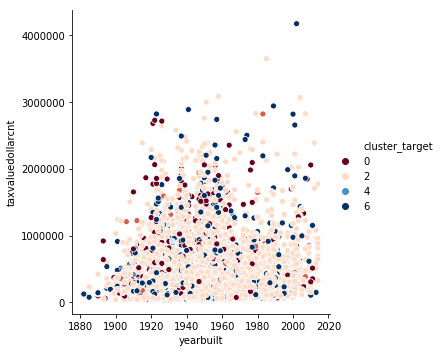

In [174]:
relplot_fun('yearbuilt','taxvaluedollarcnt', 'cluster_target', one_and_two_beds, 'RdBu')

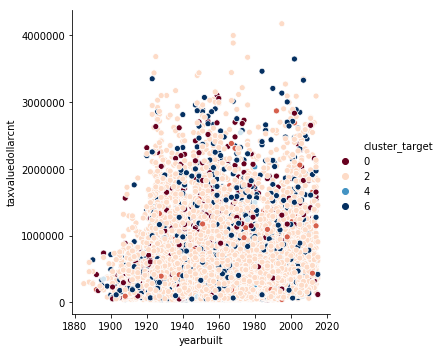

In [175]:
relplot_fun('yearbuilt','taxvaluedollarcnt', 'cluster_target', three_beds, 'RdBu')

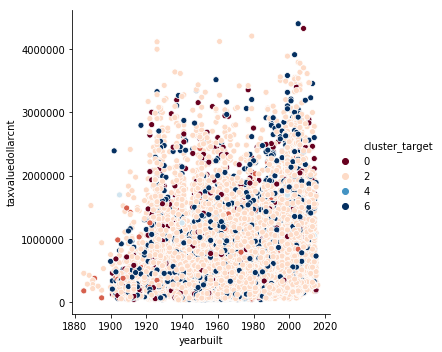

In [176]:
relplot_fun('yearbuilt','taxvaluedollarcnt', 'cluster_target', four_beds, 'RdBu')

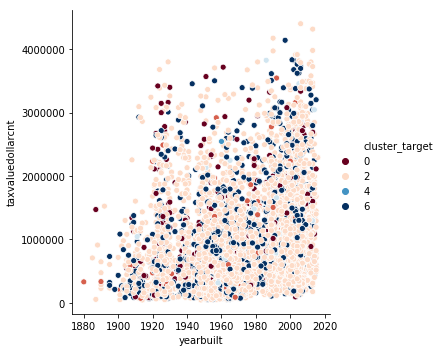

In [173]:
relplot_fun('yearbuilt','taxvaluedollarcnt', 'cluster_target', five_plus_beds, 'RdBu')

### Let's use some relplots to plot homes by bedrooms geographically.

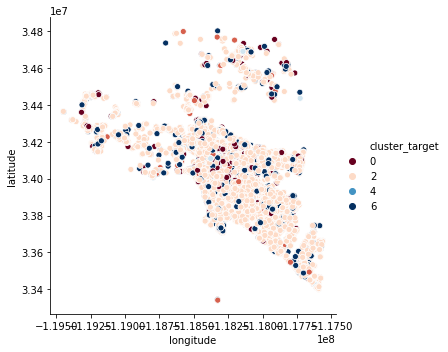

In [147]:
relplot_fun('longitude','latitude', 'cluster_target', one_and_two_beds, 'RdBu')

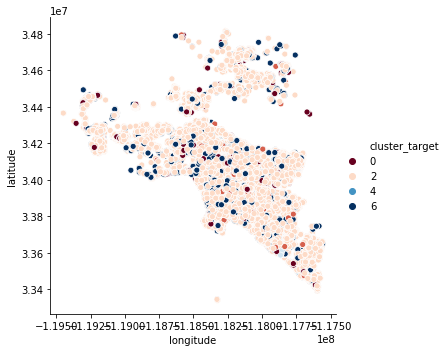

In [148]:
relplot_fun('longitude','latitude', 'cluster_target', three_beds, 'RdBu')

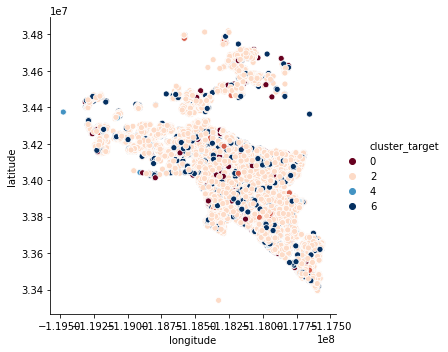

In [149]:
relplot_fun('longitude','latitude', 'cluster_target', four_beds, 'RdBu')

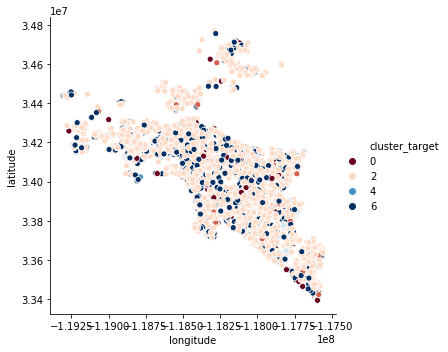

In [150]:
relplot_fun('longitude','latitude', 'cluster_target', five_plus_beds, 'RdBu')

### Looking at the 5+ bedrooms, it looks like there are more extremes in the South along the coast and the two points that come out in the Northwest.

In [191]:
tbl = pd.crosstab(one_and_two_beds['yearbuilt_bin'], one_and_two_beds['cluster_target'])
tbl

cluster_target    0   1     2  3  4    5
yearbuilt_bin                           
0               445  89  2932  4  7  577
1               339  74  3037  3  5  561
2               198  53  2412  4  2  425
3                70  21  1113  2  2  200
4                45  20   495  0  0  104
5                37   8   309  1  0   77
6                29   8   425  1  1   53
7                22   5   426  0  1   58
8                23  10   740  1  1   92
9                30  16   804  1  0   80
10               10   3   227  1  0   33
11               16   2   128  0  0   22

In [192]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

2.9107802632796555e-28

In [193]:
pd.crosstab(one_and_two_beds.yearbuilt_bin, one_and_two_beds.cluster_target, margins=True).style.background_gradient(cmap='YlOrRd')

A large percentage of homes that are 1 and 2 bedrooms are in the 0-2 yearbuilt_bin groups.
Year built bins 0, 1 have a high amount of the extreme logerrors, based on the cluster target.

In [194]:
tbl = pd.crosstab(three_beds['yearbuilt_bin'], three_beds['cluster_target'])
tbl

cluster_target    0   1     2  3  4    5
yearbuilt_bin                           
0               301  56  2390  6  1  477
1               303  80  3529  8  6  617
2               235  68  3967  6  3  608
3               253  67  4362  5  1  586
4               234  64  4790  6  3  648
5               150  60  3776  7  7  532
6               115  42  3033  7  0  426
7                91  30  2700  7  3  316
8                86  32  3316  3  2  382
9               147  49  4054  8  3  465
10               58  26  2535  0  2  222
11               56  24  2159  1  1  196

In [195]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

1.5385799150557108e-110

In [196]:
pd.crosstab(three_beds.yearbuilt_bin, three_beds.cluster_target, margins=True).style.background_gradient(cmap='YlOrRd')

In [197]:
tbl = pd.crosstab(four_beds['yearbuilt_bin'], four_beds['cluster_target'])
tbl

cluster_target    0   1     2   3  4    5
yearbuilt_bin                            
0               134  36   890   4  1  236
1                85  22  1014   4  3  211
2                74  10  1016   2  1  198
3                55  25  1319   0  2  203
4                84  34  1880   5  1  294
5                77  26  1699   4  2  252
6                81  46  3284   7  3  479
7                86  42  3150   9  2  394
8                95  20  3258   4  5  460
9                82  38  3127   6  3  399
10               71  19  2879  10  2  331
11               84  34  3345   4  0  410

In [198]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

1.1397505966036315e-91

In [199]:
pd.crosstab(four_beds.yearbuilt_bin, four_beds.cluster_target, margins=True).style.background_gradient(cmap='YlOrRd')

In [200]:
tbl = pd.crosstab(five_plus_beds['yearbuilt_bin'], five_plus_beds['cluster_target'])
tbl

cluster_target   0   1     2  3  4    5
yearbuilt_bin                          
0               61  16   374  2  0  136
1               22   6   268  0  0   89
2               20   7   233  3  0   64
3               23   8   212  0  0   50
4               10   4   240  0  0   60
5               16   5   244  1  1   87
6               31  10   849  5  0  170
7               26   9   838  2  1  149
8               25   5   490  2  2  126
9               16  13   476  1  0  135
10              32  13  1102  6  2  205
11              46  16  1825  7  1  330

In [201]:
stat, p, dof, expected = stats.chi2_contingency(tbl)
p

1.5266224980647904e-30

In [202]:
pd.crosstab(five_plus_beds.yearbuilt_bin, five_plus_beds.cluster_target, margins=True).style.background_gradient(cmap='YlOrRd')

# Thoughts: 1 and 2 bedroom homes tend to be older.  Older homes, in some sense, also tend to have larger logerrors.  Let's try a clustering model using bedroomcnt, yearbuilt, and logerror to see what we come up with.

In [362]:
X_bedcnt_year_taxvalue.drop(['bedroomcnt','yearbuilt','taxvaluedollarcnt'], axis=1, inplace=True)

In [363]:
X_bedcnt_year_taxvalue = df[['bedroomcnt', 'yearbuilt','taxvaluedollarcnt']]
X_bedcnt_year_taxvalue.shape

(107149, 3)

In [364]:
kmeans = KMeans(n_clusters=5, random_state=random_state)
kmeans.fit(X_bedcnt_year_taxvalue)
X_bedcnt_year_taxvalue['bed_yr_tax_clust'] = kmeans.predict(X_bedcnt_year_taxvalue)

In [228]:
estimators = [('8 Clusters', KMeans(n_clusters=8)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('5 Clusters', KMeans(n_clusters=5))]

<IPython.core.display.Javascript object>


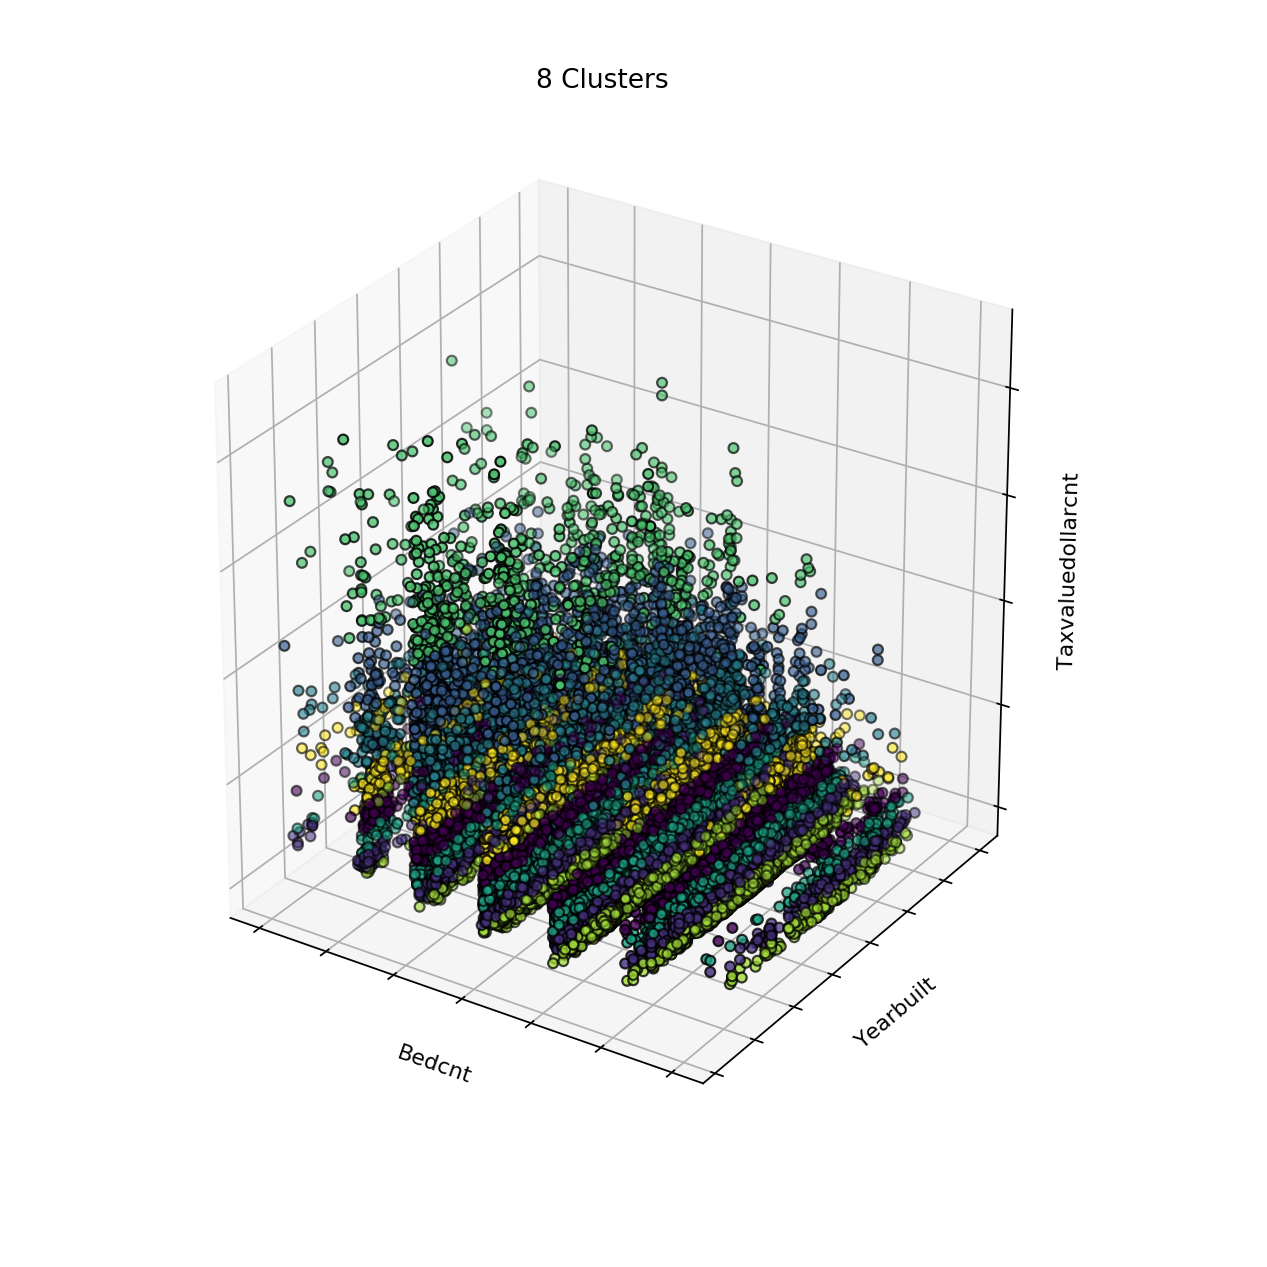

<IPython.core.display.Javascript object>


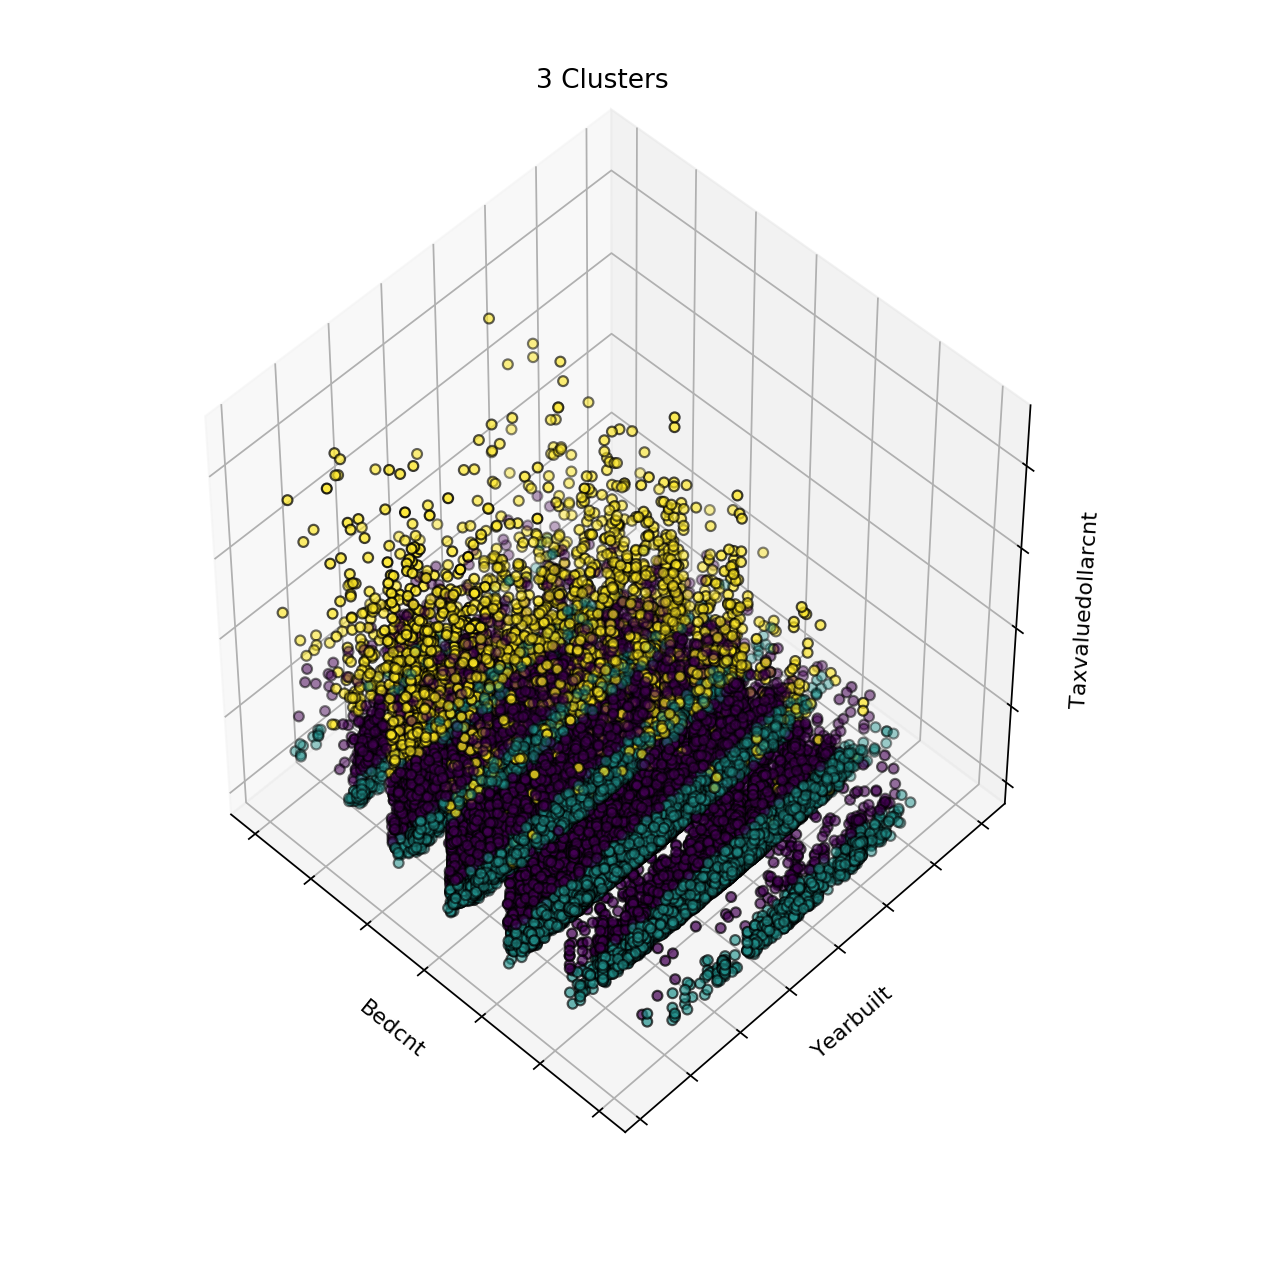

<IPython.core.display.Javascript object>


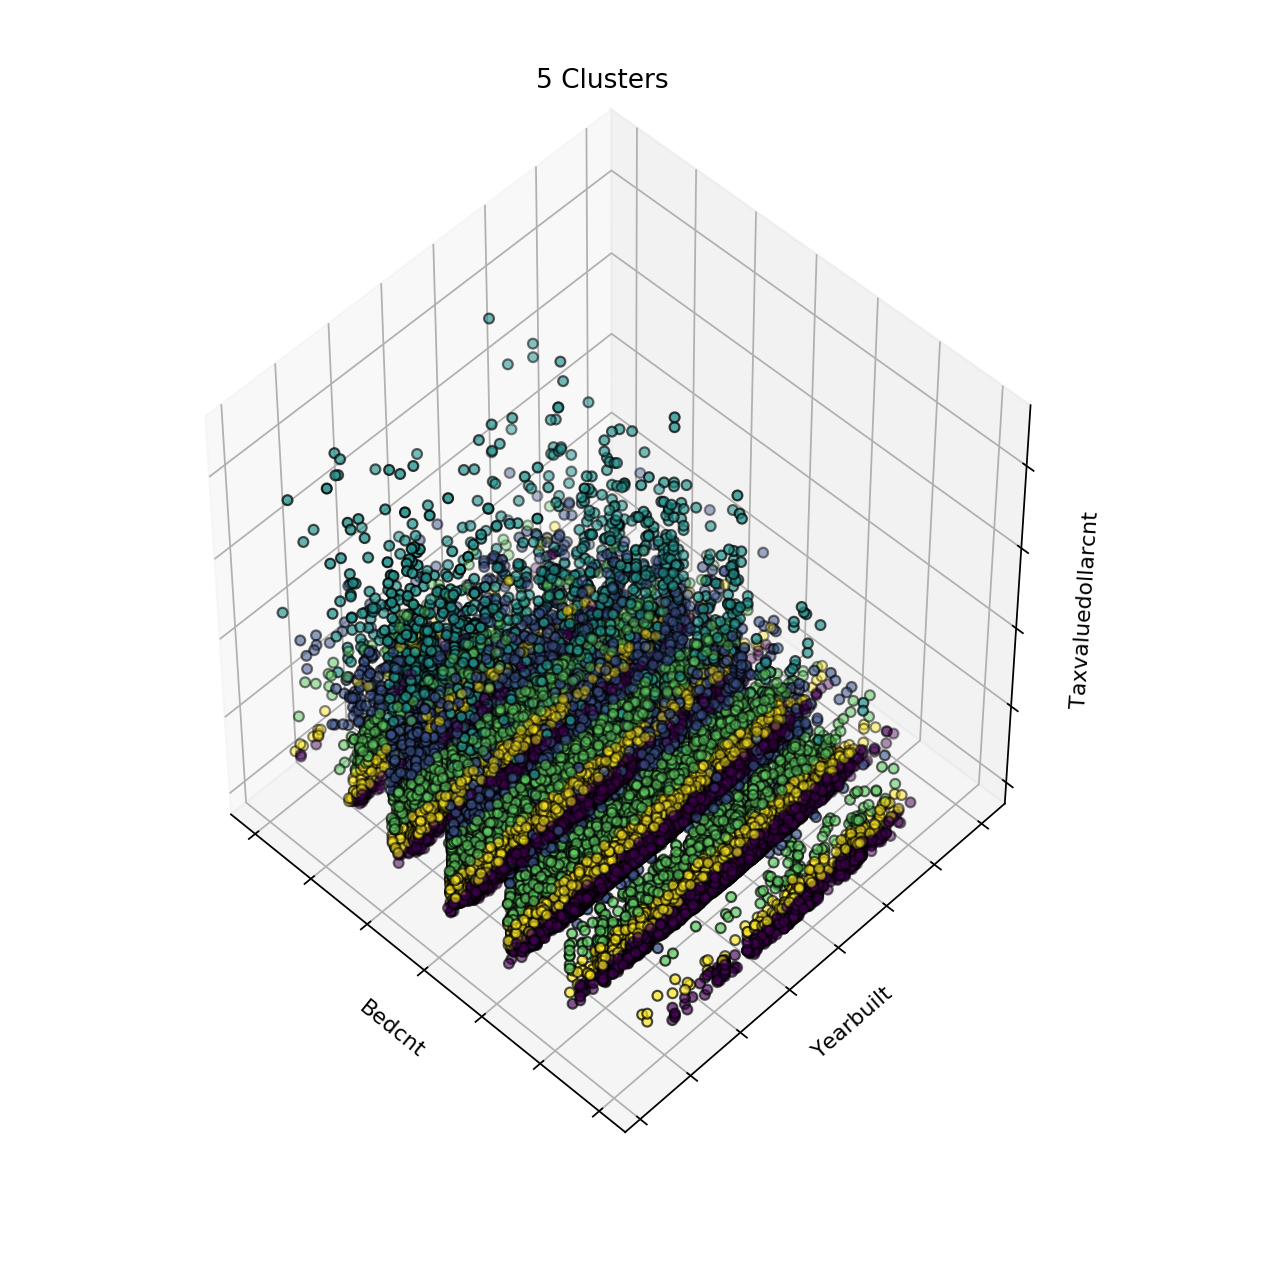

In [229]:
%matplotlib notebook

for i, (title, kmeans) in enumerate(estimators):
    # fit the model
    kmeans.fit(X_bedcnt_year_taxvalue)

    labels = kmeans.labels_

    # setup the 3d plot
    fignum = i + 1
    fig = plt.figure(fignum, figsize=(8,8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # plot the points
    ax.scatter(X_bedcnt_year_taxvalue.bedroomcnt, X_bedcnt_year_taxvalue.yearbuilt, X_bedcnt_year_taxvalue.taxvaluedollarcnt,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    ax.set_xlabel('Bedcnt')
    ax.set_ylabel('Yearbuilt')
    ax.set_zlabel('Taxvaluedollarcnt')

    ax.set_title(title)
    ax.dist = 12

In [285]:
X_bedcnt_year_taxvalue.head()

cluster_target  bed_yr_tax_clust
0               0                 1
1               0                 1
2               4                 0
4               0                 1
5               2                 3

In [365]:
X_bedcnt_year_taxvalue.drop(['bedroomcnt','yearbuilt','taxvaluedollarcnt'], axis=1, inplace=True)

In [366]:
df = pd.concat([df, X_bedcnt_year_taxvalue], axis=1)
df.head()

parcelid  logerror  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0  11016594    0.0276         3.0          2.0                        1684.0   
1  14366692   -0.1684         4.0          3.5                        2263.0   
2  12098116   -0.0040         2.0          3.0                        2217.0   
4  14432541   -0.0050         4.0          2.5                        2283.0   
5  11509835   -0.2705         4.0          4.0                        3067.0   

   transactiondate  yearbuilt    fips    latitude    longitude  \
0         20160101     1959.0  6037.0  34280990.0 -118488536.0   
1         20160101     2014.0  6059.0  33668120.0 -117677556.0   
2         20160101     1940.0  6037.0  34136312.0 -118175032.0   
4         20160102     1981.0  6059.0  33485643.0 -117700234.0   
5         20160102     1982.0  6037.0  33870089.0 -118402768.0   

         ...         longitude_bin  lotsizesquarefeet_bin  \
0        ...                     2                      7   
1        ...                    11                      0   
2        ...                     5                     10   
4        ...                    11                      3   
5        ...                     2                      0   

   structuretaxvaluedollarcnt_bin landtaxvaluedollarcnt_bin taxamount_bin  \
0                               5                         6             8   
1                              10                         6            10   
2                               1                         2            10   
4                               7                         6             7   
5                              11                        11            11   

  calculatedfinishedsquarefeet_bin logerror_bin  logerror_extremes_bin  \
0                                6            8                      3   
1                                8            0                      3   
2                                8            4                      3   
4                                8            4                      3   
5                               10            0                      3   

   logerror_quartiles  bed_yr_tax_clust  
0                   2                 0  
1                   0                 0  
2                   1                 4  
4                   1                 0  
5                   0                 2  

[5 rows x 39 columns]

# Regression Models

### First time through: We have a column that created clusters based on taxvalue, bedroomcnt, and yearbuilt.  Let's split the data and run a regression model to see how this cluster feature and a few other features work.

In [367]:
train, test = train_test_split(df, train_size=0.70, random_state=random_state)

In [322]:
train.shape

(75004, 43)

In [368]:
test.shape

(32145, 39)

In [369]:
list(df)

['parcelid',
 'logerror',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'transactiondate',
 'yearbuilt',
 'fips',
 'latitude',
 'longitude',
 'calculatedbathnbr',
 'fullbathcnt',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertylandusedesc',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'bedroomcnt_bin',
 'bathroomcnt_bin',
 'transactiondate_bin',
 'yearbuilt_bin',
 'latitude_bin',
 'longitude_bin',
 'lotsizesquarefeet_bin',
 'structuretaxvaluedollarcnt_bin',
 'landtaxvaluedollarcnt_bin',
 'taxamount_bin',
 'calculatedfinishedsquarefeet_bin',
 'logerror_bin',
 'logerror_extremes_bin',
 'logerror_quartiles',
 'bed_yr_tax_clust']

In [371]:
X_train = train.drop(['logerror', 'logerror_bin', 'logerror_extremes_bin', 'logerror_quartiles'], axis=1)
X_test = test.drop(['logerror', 'logerror_bin', 'logerror_extremes_bin', 'logerror_quartiles'], axis=1)
y_train = train[['logerror']]
y_test = test[['logerror']]

In [372]:
X_train.shape

(75004, 35)

In [373]:
X_test.shape

(32145, 35)

In [374]:
y_train.shape

(75004, 1)

In [375]:
y_test.shape

(32145, 1)

In [394]:
def linear_regression(X_df_train, X_df_test, y_df_train, y_df_test):
    print('PearsonR for train:')
    print('  '+ str([[col, pearsonr(X_df_train[col], y_df_train.logerror)] for col in X_df_train] ))
    print('-----')
    
    ols_model = sm.OLS(y_df_train, X_df_train)
    fit = ols_model.fit()
    print(fit.summary())
    print('-----')
    
    columns = list(X_df_train)
    
    lm1 = LinearRegression()
    lm1.fit(X_df_train[columns], y_df_train)
    lm1_y_intercept = lm1.intercept_
    print('lm1 y_intercept for train:')
    print(lm1_y_intercept)
    lm1_coefficients = lm1.coef_
    print('lm1_coefficients for train: ')
    print(lm1_coefficients)

    pred_lm1_train = lm1.predict(X_df_train)

    sum_of_lm1_pred_residuals_train = abs(pred_lm1_train).sum()
    print('Sum of predicted residuals for lm1 on train sample: ')
    print(sum_of_lm1_pred_residuals_train)
    mse_lm1_train = mean_squared_error(y_df_train, pred_lm1_train)
    print("Mean squared error for train set: %.6f" % mse_lm1_train)
    
    r2_lm1 = r2_score(y_train, pred_lm1_train)

    print('  {:.2%} of the variance in the logerror can be explained by these features.'.format(r2_lm1))

In [395]:
X_train_1 = X_train[['calculatedfinishedsquarefeet', 'regionidzip', 'bed_yr_tax_clust']]
X_test_1 = X_test[['calculatedfinishedsquarefeet', 'regionidzip', 'bed_yr_tax_clust']]

X_train_2 = X_train[['calculatedfinishedsquarefeet', 'regionidzip', 'bed_yr_tax_clust', 'latitude', 'longitude']]
X_test_2 = X_test[['calculatedfinishedsquarefeet', 'regionidzip', 'bed_yr_tax_clust', 'latitude', 'longitude']]

X_train_3 = X_train[['calculatedfinishedsquarefeet', 'bed_yr_tax_clust', 'latitude', 'longitude']]
X_test_3 = X_test[['calculatedfinishedsquarefeet', 'bed_yr_tax_clust', 'latitude', 'longitude']]

In [396]:
X_train_1.shape

(75004, 3)

In [397]:
X_train_1.head()

calculatedfinishedsquarefeet  regionidzip  bed_yr_tax_clust
106955                        2804.0      97329.0                 4
131174                        2838.0      97118.0                 0
25528                         3063.0      96321.0                 0
36831                         1580.0      96475.0                 4
64113                         1179.0      96047.0                 0

In [398]:
X_test_1.shape

(32145, 3)

In [399]:
y_train.shape

(75004, 1)

In [400]:
y_test.shape

(32145, 1)

In [401]:
linear_regression(X_train_1, X_test_1, y_train, y_test)

PearsonR for train:
  [['calculatedfinishedsquarefeet', (0.04949944164425326, 6.508294404383164e-42)], ['regionidzip', (0.014584769106202386, 6.484299046536227e-05)], ['bed_yr_tax_clust', (0.011219388211815184, 0.0021214341146996865)]]
-----
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     274.6
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          2.71e-177
Time:                        08:55:05   Log-Likelihood:                 30264.
No. Observations:               75004   AIC:                        -6.052e+04
Df Residuals:                   75001   BIC:                        -6.049e+04
Df Model:                           3                                         
Covariance Type:            nonrobust          

In [384]:
linear_regression(X_train_2, X_test_2, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     167.0
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          3.23e-177
Time:                        16:52:23   Log-Likelihood:                 30269.
No. Observations:               75004   AIC:                        -6.053e+04
Df Residuals:                   74999   BIC:                        -6.048e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinish

In [387]:
linear_regression(X_train_3, X_test_3, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          1.63e-176
Time:                        08:44:36   Log-Likelihood:                 30265.
No. Observations:               75004   AIC:                        -6.052e+04
Df Residuals:                   75000   BIC:                        -6.048e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinish

### X2 is our best performing on the train set based on MSE.  Let's run it on the test sample to see how it performs.

In [392]:
def linear_regression_test(X_df_train, X_df_test, y_df_train, y_df_test):
#     print('PearsonR for train:')
#     print('  '+ str([[col, pearsonr(X_df_train[col], y_df_train.logerror)] for col in X_df_train] ))
#     print('-----')
    
    ols_model = sm.OLS(y_df_train, X_df_train)
    fit = ols_model.fit()
    print(fit.summary())
    print('-----')
    
    columns = list(X_df_train)
    
    lm1 = LinearRegression()
    lm1.fit(X_df_train[columns], y_df_train)
    lm1_y_intercept = lm1.intercept_
    print('lm1 y_intercept for train:')
    print(lm1_y_intercept)
    lm1_coefficients = lm1.coef_
    print('lm1_coefficients for train: ')
    print(lm1_coefficients)

    pred_lm1_train = lm1.predict(X_df_train)

    sum_of_lm1_pred_residuals_train = abs(pred_lm1_train).sum()
    print('Sum of predicted residuals for lm1 on train sample: ')
    print(sum_of_lm1_pred_residuals_train)
    mse_lm1_train = mean_squared_error(y_df_train, pred_lm1_train)
    print("Mean squared error for train set: %.6f" % mse_lm1_train)
    
    r2_lm1 = r2_score(y_train, pred_lm1_train)

    print('  {:.2%} of the variance in the logerror can be explained by these features.'.format(r2_lm1))

    pred_lm1 = lm1.predict(X_df_test)

    sum_of_lm1_pred_residuals = abs(pred_lm1).sum()
    print('Sum of predicted residuals for lm1 on test sample: ')
    print(sum_of_lm1_pred_residuals)
    mse_lm1 = mean_squared_error(y_df_test, pred_lm1)
    print("Mean squared error: %.6f" % mse_lm1)

In [393]:
linear_regression_test(X_train_2, X_test_2, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          3.23e-177
Time:                        08:48:39   Log-Likelihood:                 30269.
No. Observations:               75004   AIC:                        -6.053e+04
Df Residuals:                   74999   BIC:                        -6.048e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinish

# Let's go back to using groups based on the number of bedrooms.  Let's see if we can find clusters among them.

In [402]:
df.shape

(107149, 39)

In [403]:
one_and_two_beds.shape

(16940, 39)

In [404]:
three_beds.shape

(48809, 39)

In [405]:
four_beds.shape

(32172, 39)

In [406]:
five_plus_beds.shape

(9228, 39)